## Exploratory Data Analysis for UNSW-NB15 DATASET
In this part the exploring part of the dataset is performed.

Steps followed in this part

- Visulaise and Understand all column Names
- Calculate the Label values as Attack and Non Attack or Normal
- Get Numeric and Categorical Columns
- Get Corelation for Numerical features.
- Get Highly Corelated features 
- Less Corelated Features
- PDF plots for Numerical Features compared to Attack
- Bar Plots for Categorical Features compared to Attack


In [ ]:
# Core data manipulation and analysis libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and arrays

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Enable inline plotting in Jupyter notebooks
# Fixed duplicate import and invalid syntax
%matplotlib inline


# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the cleaned dataset.


In [2]:
    
# Reading datasets
# Using list comprehension to read all csv files in 4 csv files
df = pd.read_csv('C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Github/Code Working/Data Cleaning and EDA/Cleaned_full_data.csv', header=0) 
df.head()


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,7,9,1,1,1,1,1,Normal,0


In [3]:
# Checking Full data is avaliable or not
df.shape

(2540047, 49)

### Column names and their meanings given in dataset.

In [ ]:
# This csv file contains names of all the features
# ISO-8859-1 encoding is used to handle special characters and accents in the CSV file

feature_names_df = pd.read_csv('C:/Users/raman/OneDrive/Important/1UnisaSTUDY/Courses/Capstone_Project_1/Dataset/Nour Moustafa/CSV Files/NUSW-NB15_features.csv', encoding='ISO-8859-1')

# 'Name' is a column in the feature_names_df DataFrame that contains feature names being standardized
# The standardization process transforms these names by:
# 1. Converting to lowercase
# 2. Removing leading/trailing whitespace 
# 3. Removing spaces between words
# This ensures consistent naming convention across the dataset
feature_names_df['Name'] = feature_names_df['Name'].str.strip().str.lower().str.replace(' ', '')

# Display the transformed DataFrame
feature_names_df

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### Find the Categorical and Numerical Features 

In [5]:
# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Count the number of categorical and numerical features
num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

print("\n=== Feature Analysis ===")
print(f"\nTotal Features: {num_categorical_features + num_numerical_features}")
print(f"\nCategorical Features ({num_categorical_features}):")
print("-" * 50)
for feat in categorical_features:
    print(f"- {feat}")
    print(f"  Unique values: {df[feat].nunique()}")
    print(f"  Missing values: {df[feat].isnull().sum()}")
    print(f"  Most common: {df[feat].value_counts().nlargest(3).to_dict()}\n")

print(f"\nNumerical Features ({num_numerical_features}):")
print("-" * 50)
for feat in numerical_features:
    print(f"- {feat}")
    print(f"  Range: {df[feat].min():.2f} to {df[feat].max():.2f}")
    print(f"  Missing values: {df[feat].isnull().sum()}\n")



=== Feature Analysis ===

Total Features: 49

Categorical Features (8):
--------------------------------------------------
- srcip
  Unique values: 43
  Missing values: 0
  Most common: {'59.166.0.4': 197959, '59.166.0.1': 197680, '59.166.0.5': 197626}

- sport
  Unique values: 100341
  Missing values: 0
  Most common: {1043: 216289, 47439: 198580, 0: 50432}

- dstip
  Unique values: 47
  Missing values: 0
  Most common: {'149.171.126.3': 197771, '149.171.126.2': 197648, '149.171.126.4': 197639}

- dsport
  Unique values: 128310
  Missing values: 0
  Most common: {'53': 618507, 53: 180461, '80': 126478}

- proto
  Unique values: 135
  Missing values: 0
  Most common: {'tcp': 1495074, 'udp': 990435, 'unas': 16202}

- state
  Unique values: 16
  Missing values: 0
  Most common: {'FIN': 1478689, 'CON': 560588, 'INT': 490471}

- service
  Unique values: 13
  Missing values: 0
  Most common: {'none': 1246397, 'dns': 781668, 'http': 206273}

- attack_cat
  Unique values: 11
  Missing values

### Find the corelation 

#### First Step is to divide the datframe into attacked and non-attcked categories

In [6]:
# Divide the DataFrame into attack and non-attack categories
attack = df[df['label'] == 1]
non_attack = df[df['label'] == 0]

# Display the shapes of the resulting DataFrames
print("Attack DataFrame shape:", attack.shape)
print("Non-Attack DataFrame shape:", non_attack.shape)

Attack DataFrame shape: (321283, 49)
Non-Attack DataFrame shape: (2218764, 49)


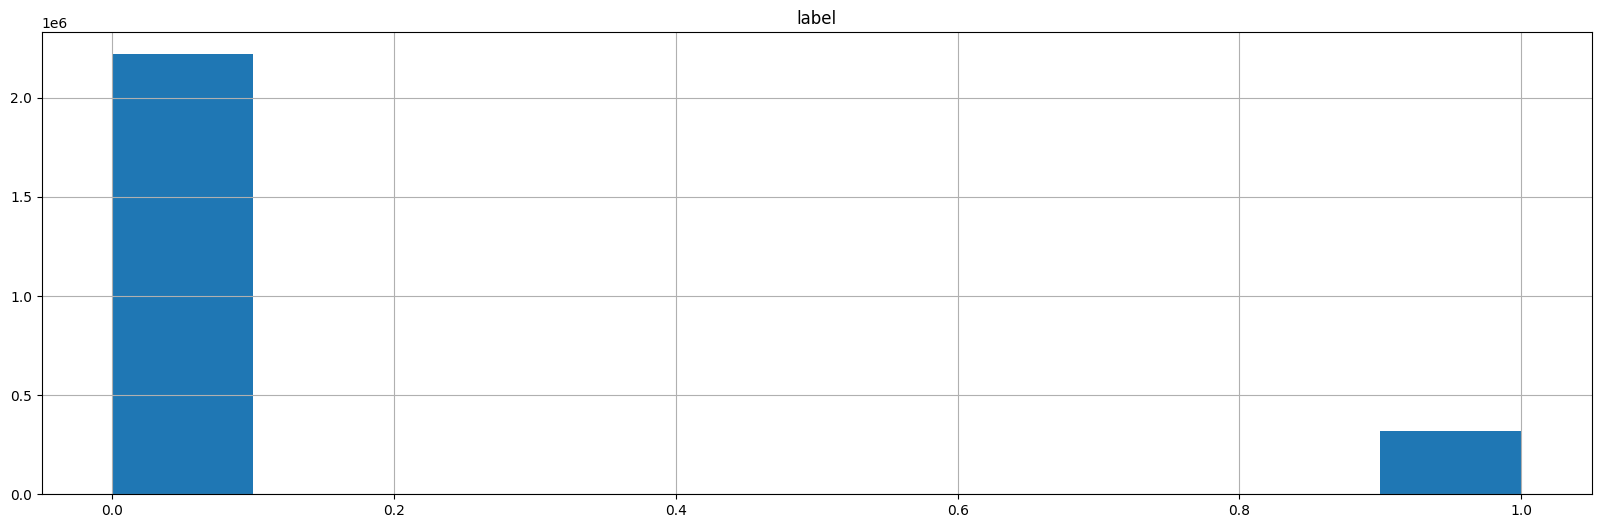

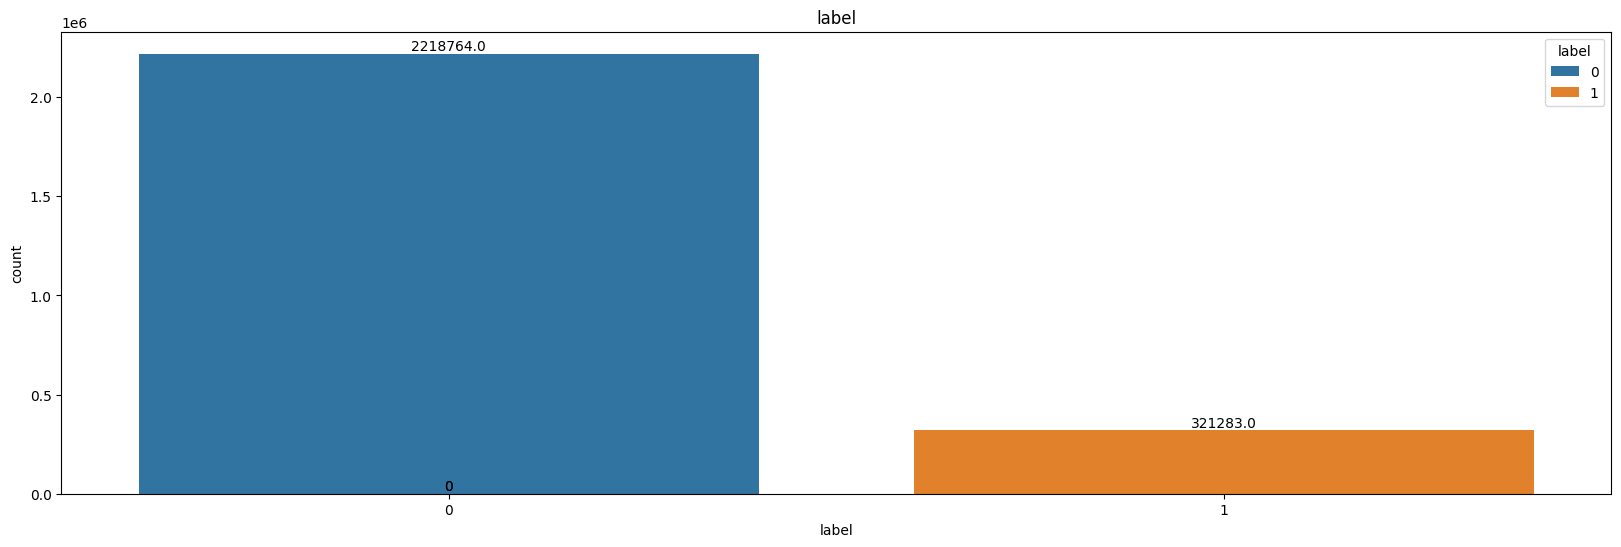

In [7]:
def plot_hist(col, figsize=(20,6), bins=10):
    """
    This function plots histogram for given feature
    """
    plt.figure(figsize=figsize)
    plt.title(col)
    df[col].hist(bins=bins)
    plt.show()

def plot_count(col, hue="label", figsize=(20,6)):
    """
    This function plots count plot for given feature
    """
    plt.figure(figsize=figsize)
    plt.title(col)
    ax = sns.countplot(x=col, hue=hue, data=df)
    
    # Add count numbers on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

plot_hist('label')  # Plot histogram of label column
plot_count('label')  # Plot count plot of label column

### Create corelation function

**`In the context of cybersecurity, analyzing the correlation between different features in a dataset can help identify patterns and relationships that may indicate malicious activity or network anomalies.`**

In [8]:
# Define a function to calculate the correlation between two columns

def corr(col1, col2="label", df=df):
    """
    This function calculates the Pearson correlation coefficient between two columns in a dataframe:
    - col1: First column name to correlate (required)
    - col2: Second column name to correlate (defaults to "label")
    - df: Input dataframe (defaults to df)
    
    The function:
    1. Takes the two specified columns from the dataframe
    2. Calculates the correlation matrix between them
    3. Returns the correlation coefficient (a value between -1 and 1)
    where:
    - 1 indicates perfect positive correlation
    - -1 indicates perfect negative correlation 
    - 0 indicates no correlation
    """
    return df[[col1, col2]].corr().iloc[0,1]


## Plot corelation matrix for numerical values
### In next step we plot the correlation matrix for the numerical values in the dataset and small summary from the plot is given below:

In general, if two features are highly correlated, it means that there is a strong relationship between them, and changes in one feature are closely associated with changes in the other. This can have several implications:

### 1. **Redundancy**:
   - **Implication**: Highly correlated features may provide redundant information. For example, if the number of bytes sent (`sbytes`) and the number of packets sent (`spkts`) are highly correlated, it suggests that the amount of data transferred is proportional to the number of packets.
   - **Action**: In feature selection for machine learning models, removing one of the highly correlated features can be considered to reduce redundancy and improve model performance.

### 2. **Detection of Anomalies**:
   - **Implication**: High correlation between certain features can help in detecting anomalies. For example, if the source IP address (`srcip`) and destination IP address (`dstip`) are highly correlated, it might indicate a specific communication pattern. Any deviation from this pattern could be flagged as suspicious.
   - **Action**: Use correlation patterns to define normal behavior and detect deviations that may indicate attacks or anomalies.

### 3. **Understanding Attack Patterns**:
   - **Implication**: High correlation between features can help in understanding attack patterns. For example, if the duration of a connection (`dur`) and the number of bytes transferred (`dbytes`) are highly correlated during an attack, it might indicate that the attacker is transferring large amounts of data over long connections.
   - **Action**: Analyze correlated features to identify and understand common characteristics of different types of attacks.

### 4. **Feature Engineering**:
   - **Implication**: High correlation can guide feature engineering efforts. For example, if the time-to-live values (`sttl` and `dttl`) are highly correlated, it might indicate that packets are following similar paths through the network.
   - **Action**: Create new features or modify existing ones based on the insights gained from correlated features to improve the effectiveness of detection algorithms.Future Steps to consider.

### Example Scenarios

1. **Data Exfiltration**:
   - **Features**: `sbytes` (source to destination bytes) and `dbytes` (destination to source bytes).
   - **Correlation**: High correlation might indicate balanced communication. Low correlation with high `sbytes` and low `dbytes` could indicate data exfiltration, where large amounts of data are being sent out but not much is received in return.

2. **Denial of Service (DoS) Attack**:
   - **Features**: `spkts` (source to destination packet count) and `dpkts` (destination to source packet count).
   - **Correlation**: High correlation might indicate normal traffic. Low correlation with high `spkts` and low `dpkts` could indicate a DoS attack, where a large number of packets are sent to overwhelm the target, but the target does not respond with many packets.

3. **Port Scanning**:
   - **Features**: `sport` (source port number) and `dsport` (destination port number).
   - **Correlation**: High correlation might indicate normal service usage. Low correlation with varying `dsport` values could indicate port scanning, where an attacker is probing different ports to find open ones.


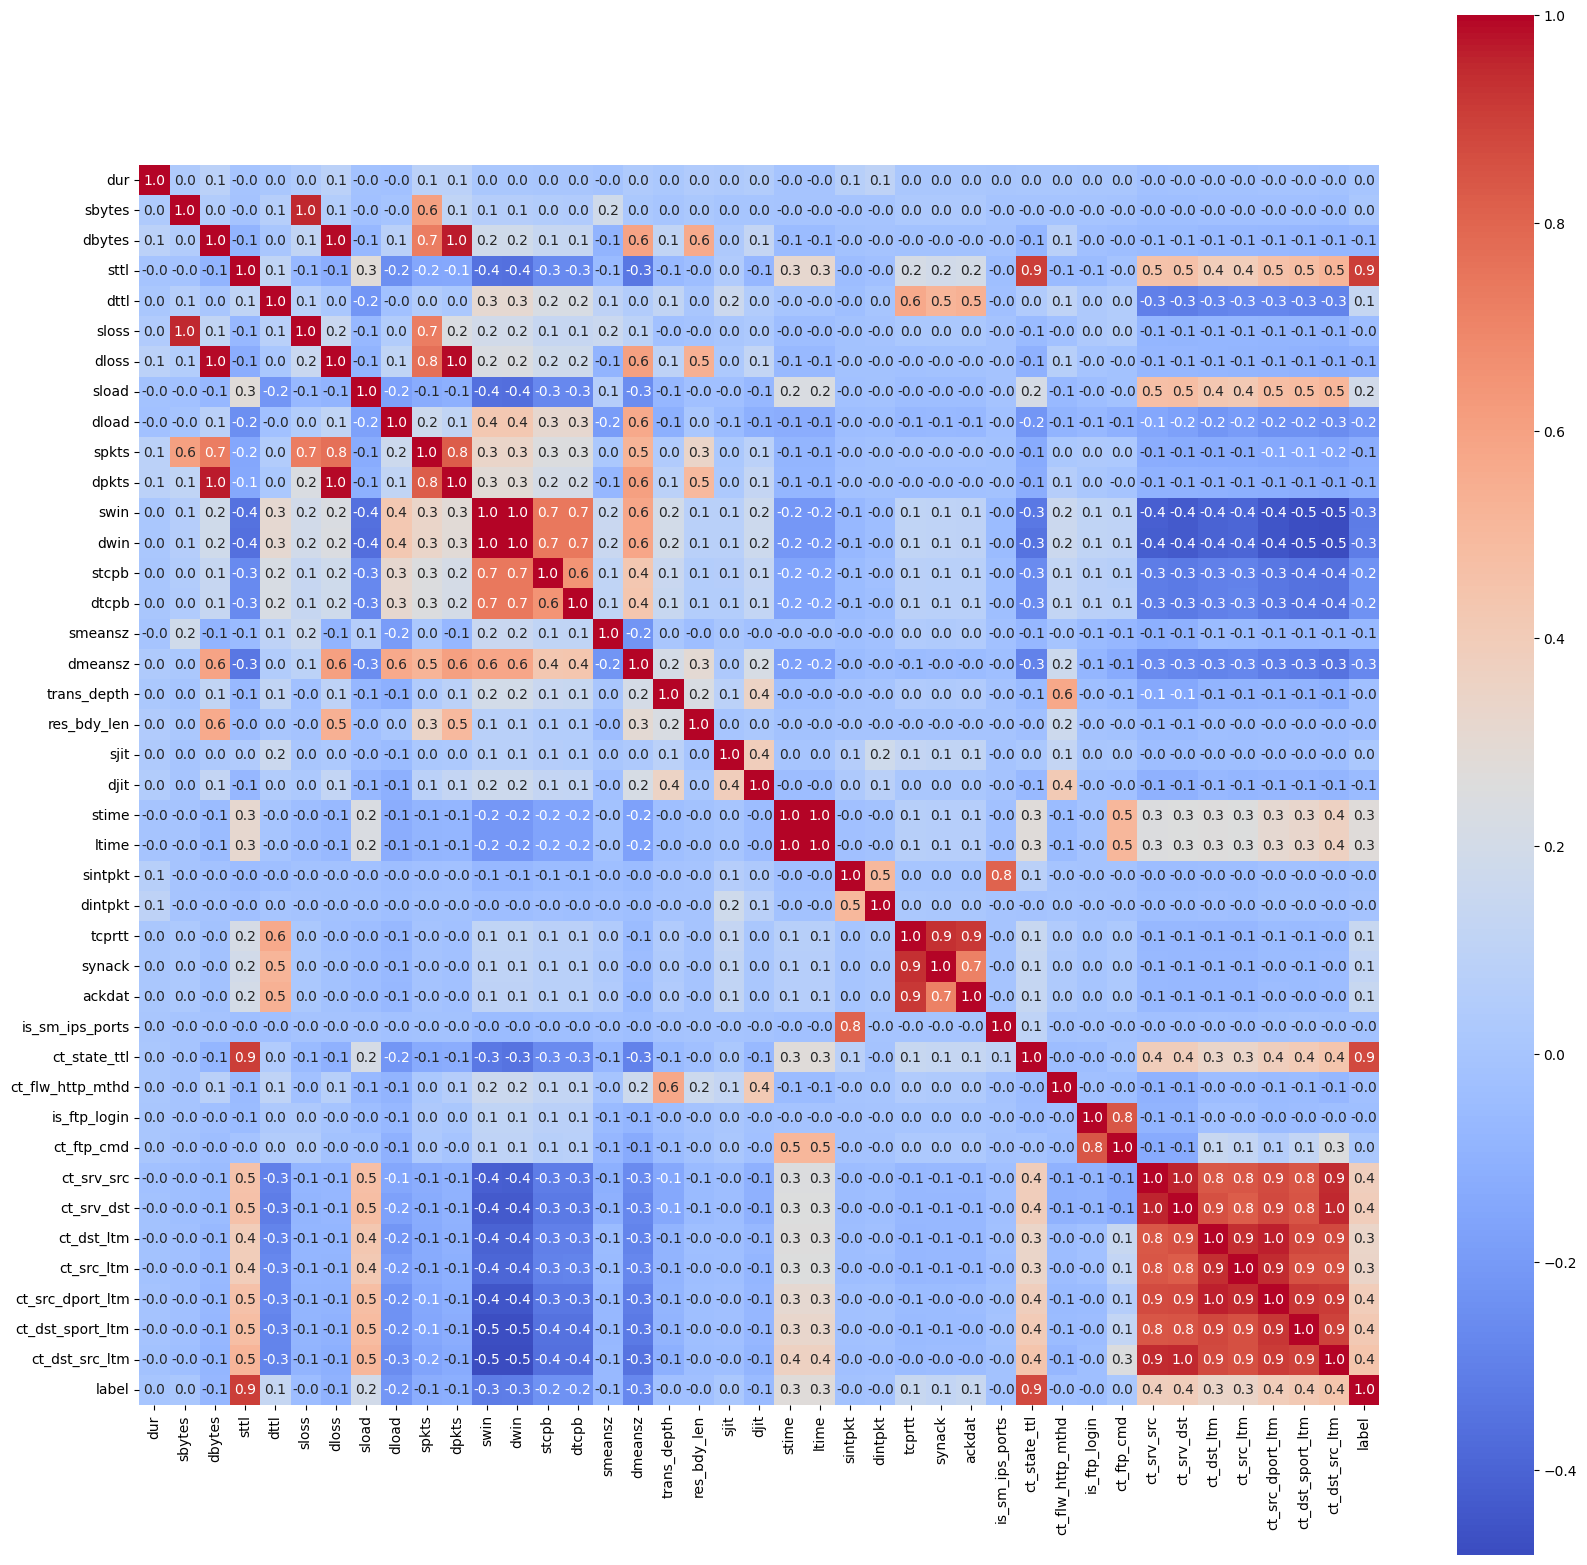

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df[numerical_features]

# Plotting the correlation matrix of the dataset
method = "pearson"
# correlation matrix
corr_mat = numeric_df.corr(method=method)

plt.figure(figsize=(20,20)) 
sns.heatmap(corr_mat, square=True, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()


## Finding the Highly Corelated Features

**`If two features are highly correlated, it means that there is a strong relationship between them, and changes in one feature are closely associated with changes in the other. `**



In [10]:
# Function to identify and print highly correlated features in a correlation matrix
# Parameters:
#   corr_mat: pandas DataFrame containing correlation matrix
#   threshold: correlation threshold (default=0.9)
def print_high_correlations(corr_mat, threshold=0.9):
    # Get column names from correlation matrix
    columns = corr_mat.columns
    
    # Create list to store correlated pairs
    correlated_features = []
    
    # Iterate through correlation matrix
    # Only check upper triangle since correlation matrix is symmetric
    for i in range(corr_mat.shape[0]):
        for j in range(i+1, corr_mat.shape[0]):
            correlation = corr_mat.iloc[i,j]
            # Check if correlation exceeds threshold
            if abs(correlation) >= threshold:
                correlated_features.append({
                    'feature1': columns[i],
                    'feature2': columns[j],
                    'correlation': correlation
                })
    
    # Print results in formatted table
    print("\nHighly correlated feature pairs:")
    print("-"*60)
    print(f"{'Feature 1':20s} {'Feature 2':20s} {'Correlation':10s}")
    print("-"*60)
    for pair in correlated_features:
        print(f"{pair['feature1']:20s} {pair['feature2']:20s} {pair['correlation']:.3f}")

# Call function with correlation matrix
print_high_correlations(corr_mat)


Highly correlated feature pairs:
------------------------------------------------------------
Feature 1            Feature 2            Correlation
------------------------------------------------------------
sbytes               sloss                0.953
dbytes               dloss                0.991
dbytes               dpkts                0.971
sttl                 ct_state_ttl         0.906
sttl                 label                0.904
dloss                dpkts                0.992
swin                 dwin                 0.997
stime                ltime                1.000
tcprtt               synack               0.931
tcprtt               ackdat               0.919
ct_srv_src           ct_srv_dst           0.957
ct_srv_src           ct_dst_src_ltm       0.942
ct_srv_dst           ct_dst_src_ltm       0.951
ct_dst_ltm           ct_src_ltm           0.939
ct_dst_ltm           ct_src_dport_ltm     0.960
ct_src_ltm           ct_src_dport_ltm     0.945
ct_src_dport_ltm     c

## Finding the Less Corelated Features

In [11]:
# Function to identify and print less correlated features in a correlation matrix
# Parameters:
#   corr_mat: pandas DataFrame containing correlation matrix
#   lower_threshold: lower correlation threshold (default=0.1)
#   upper_threshold: upper correlation threshold (default=0.5)
def print_less_correlations(corr_mat, lower_threshold=0.1, upper_threshold=0.5):
    # Get column names from correlation matrix
    columns = corr_mat.columns
    
    # Create list to store correlated pairs
    correlated_features = []
    
    # Iterate through correlation matrix
    # Only check upper triangle since correlation matrix is symmetric
    for i in range(corr_mat.shape[0]):
        for j in range(i+1, corr_mat.shape[0]):
            correlation = corr_mat.iloc[i,j]
            # Check if correlation is within the specified range
            if lower_threshold <= abs(correlation) <= upper_threshold:
                correlated_features.append({
                    'feature1': columns[i],
                    'feature2': columns[j],
                    'correlation': correlation
                })
    
    # Print results in formatted table
    print("\nLess correlated feature pairs:")
    print("-"*60)
    print(f"{'Feature 1':20s} {'Feature 2':20s} {'Correlation':10s}")
    print("-"*60)
    for pair in correlated_features:
        print(f"{pair['feature1']:20s} {pair['feature2']:20s} {pair['correlation']:.3f}")

# Call function with correlation matrix
print_less_correlations(corr_mat)


Less correlated feature pairs:
------------------------------------------------------------
Feature 1            Feature 2            Correlation
------------------------------------------------------------
sbytes               dpkts                0.110
sbytes               smeansz              0.188
dbytes               sloss                0.116
dbytes               swin                 0.188
dbytes               dwin                 0.189
dbytes               stcpb                0.140
dbytes               dtcpb                0.140
dbytes               trans_depth          0.115
dbytes               djit                 0.127
sttl                 dttl                 0.114
sttl                 dloss                -0.119
sttl                 sload                0.280
sttl                 dload                -0.247
sttl                 spkts                -0.151
sttl                 dpkts                -0.142
sttl                 swin                 -0.352
sttl               

## Numerical Features

(`Probability Density Functions (PDFs)`)

Purpose: PDF plots are used to visualize the distribution of continuous features. They show the likelihood of different values and help in understanding the underlying distribution of the data.
Usage in Cybersecurity: In cybersecurity, PDF plots can be used to compare the distributions of features between normal and attack data. 
For example, we can use PDF plots to see how the duration of connections or the number of bytes transferred differs between normal and attack traffic.

In [12]:
# This function creates a comparative visualization of probability density functions (PDFs) for a specific feature
# across two different datasets, typically used to compare attack vs non-attack data distributions.
#
# The function:
# - Takes a column/feature name and two datasets as input
# - Optionally applies a transformation to the data (e.g. log transform)
# - Creates overlaid density plots using seaborn's distplot
# - Shows the distribution curves with rug plots (small ticks showing actual data points)
# - Includes proper labeling and legend for comparison
#
# Common usage:
# dual_plot('feature_name', non_attack_df, attack_df)
# dual_plot('feature_name', non_attack_df, attack_df, method=np.log) # with log transform
#
def pdf_plot(col, data1=non_attack, data2=attack, label1='non-attack', label2='attack', method=None):
    """
    Plot probability density function (PDF) of a given feature comparing two datasets.
    
    Parameters:
        col (str): Column/feature name to plot
        data1 (DataFrame): First dataset to plot (default: non-attack data)
        data2 (DataFrame): Second dataset to plot (default: attack data) 
        label1 (str): Label for first dataset (default: 'non-attack')
        label2 (str): Label for second dataset (default: 'attack')
        method (callable): Optional transformation to apply to data before plotting
    """
    sns.set_style('whitegrid')
    
    # Apply optional transformation if provided
    plot_data1 = data1[col].apply(method) if method else data1[col]
    plot_data2 = data2[col].apply(method) if method else data2[col]
    
    # Plot distributions
    sns.distplot(plot_data1, label=label1, hist=False, rug=True)
    sns.distplot(plot_data2, label=label2, hist=False, rug=True)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()


#### Duration   `dur	Float	Record total duration`

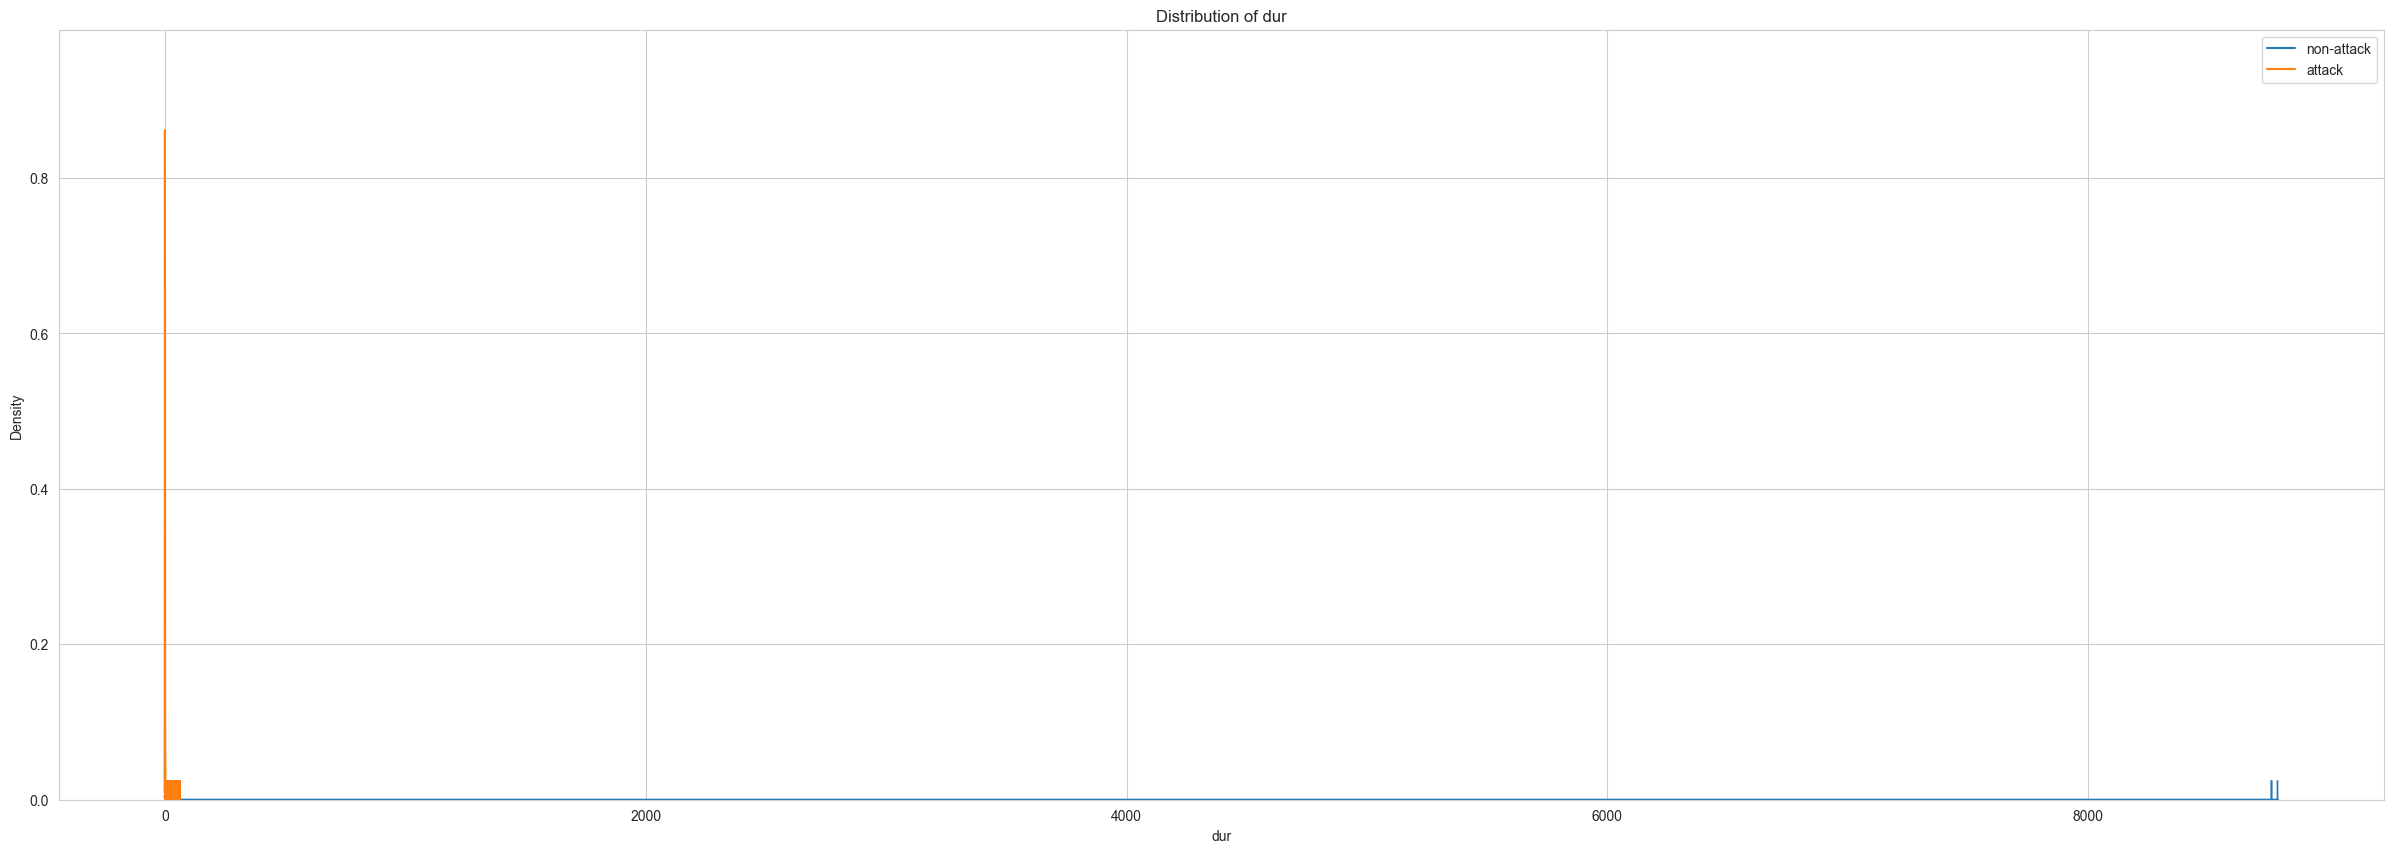

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))


# Plot feature distribution for attack and non-attack data
pdf_plot('dur')

# Display the complete figure with both subplots
plt.show()


#### ` sbytes	Integer	Source to destination transaction bytes`

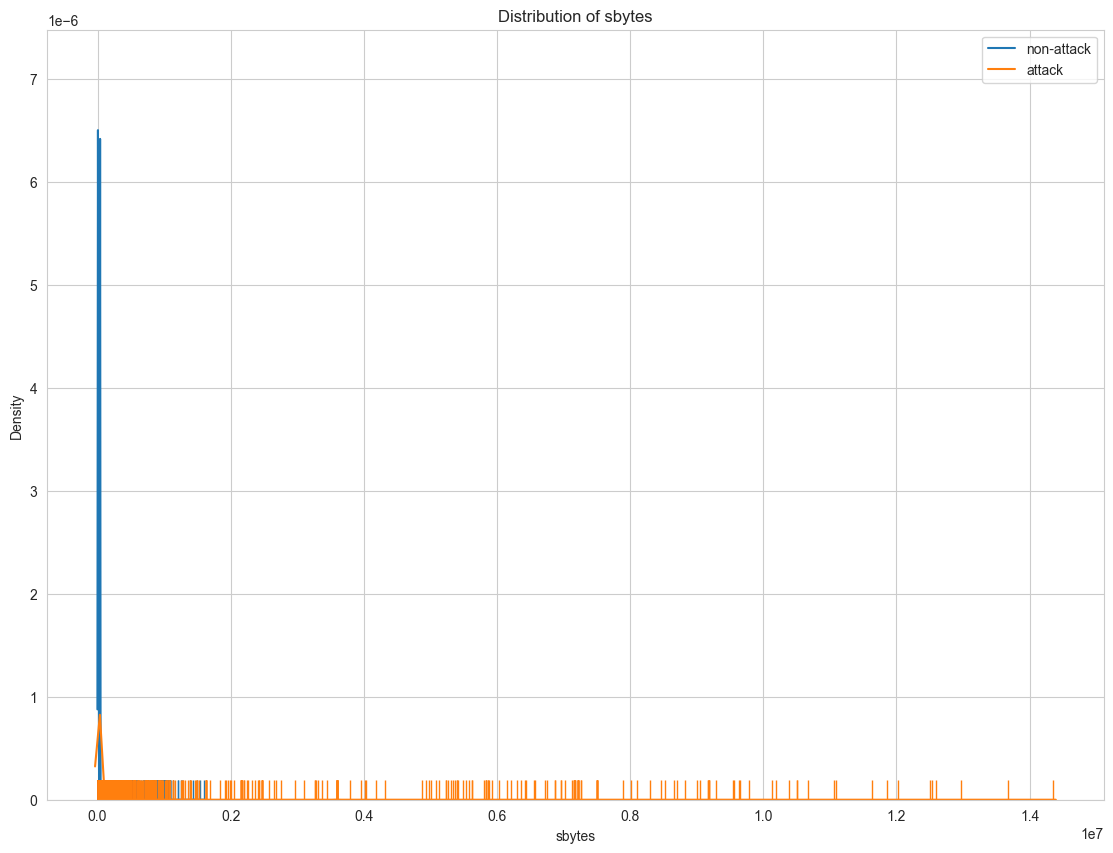

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sbytes')

# Display the complete figure with both subplots
plt.show()

#### `dbytes	Integer	Destination to source transaction bytes`

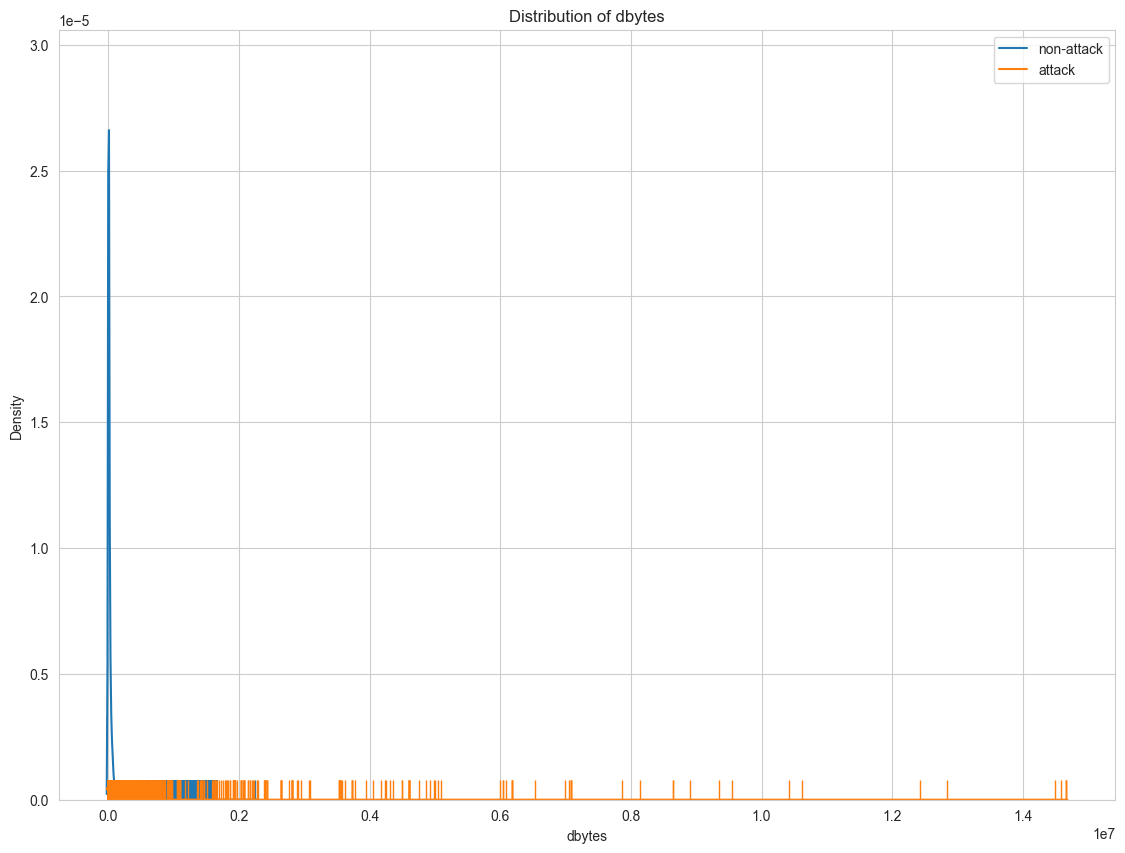

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dbytes')

# Display the complete figure with both subplots
plt.show()

#### `sttl	Integer	Source to destination time to live value`

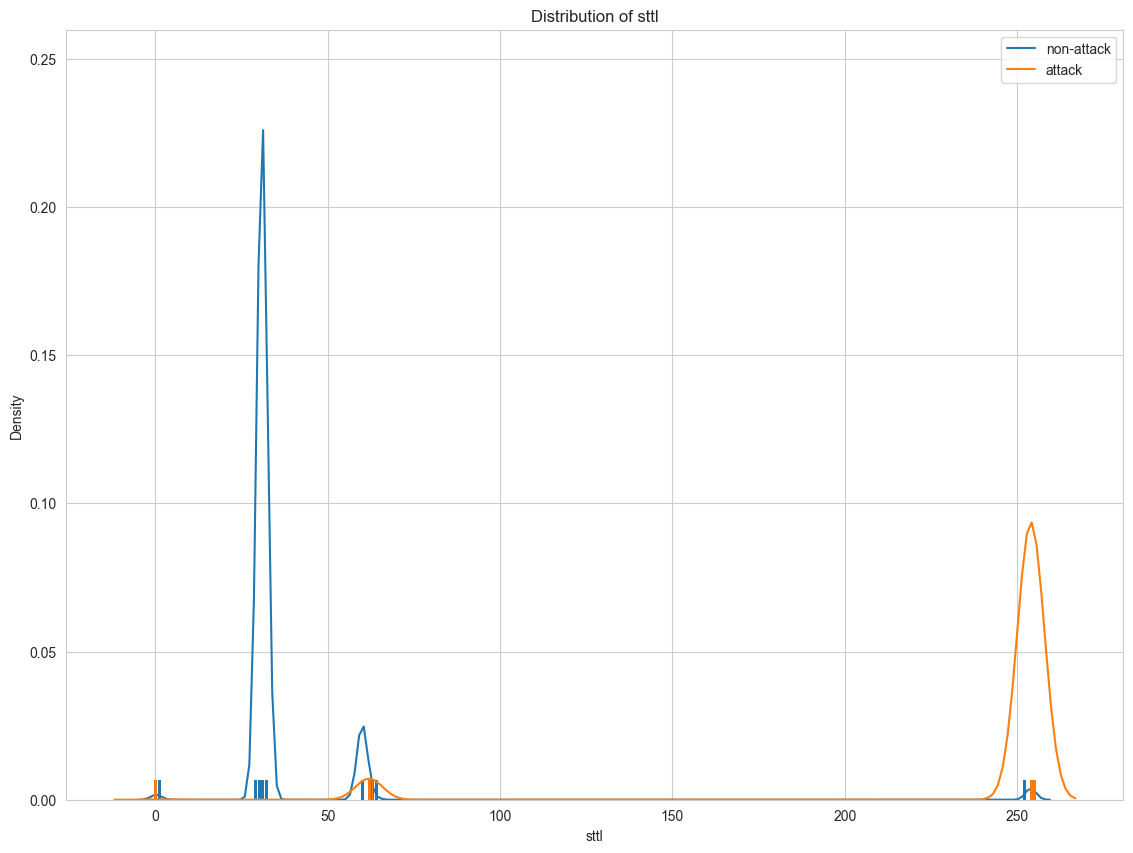

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sttl')

# Display the complete figure with both subplots
plt.show()

#### `dttl	Integer	Destination to source time to live value`

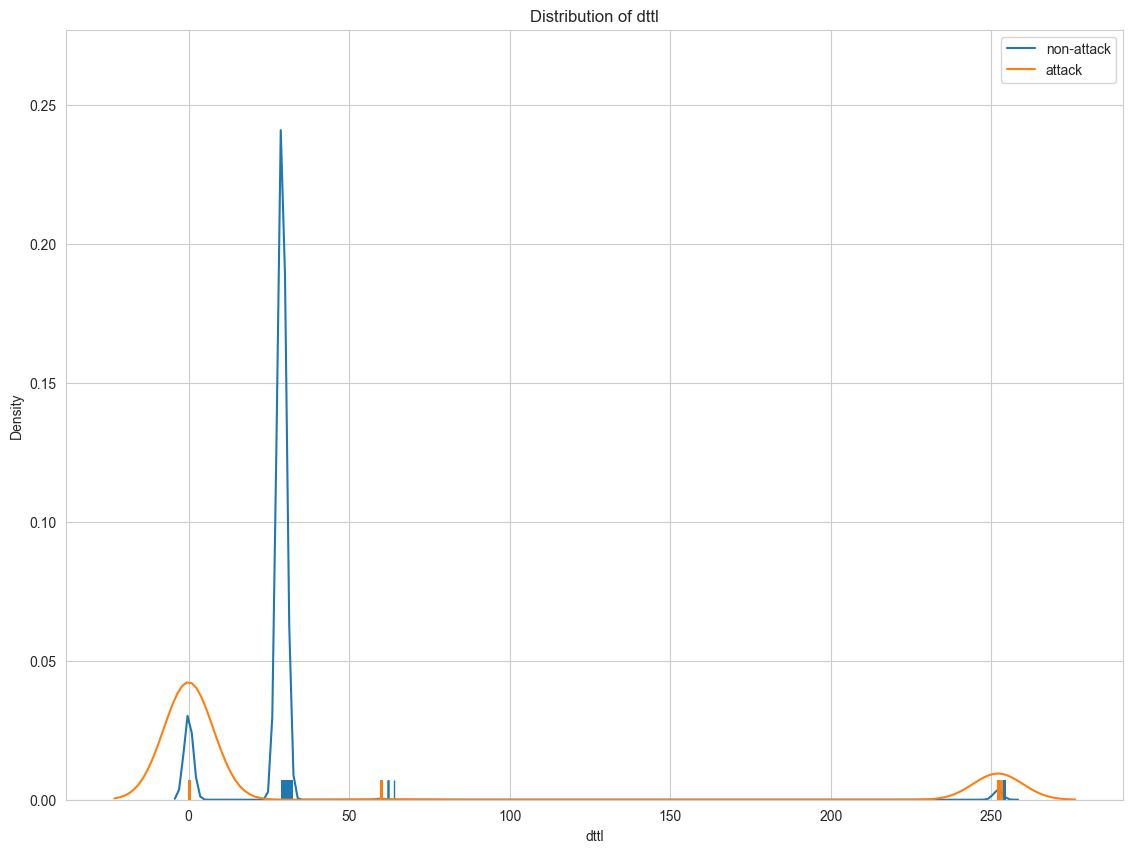

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dttl')

# Display the complete figure with both subplots
plt.show()

#### `sloss	Integer	Source packets retransmitted or dropped`

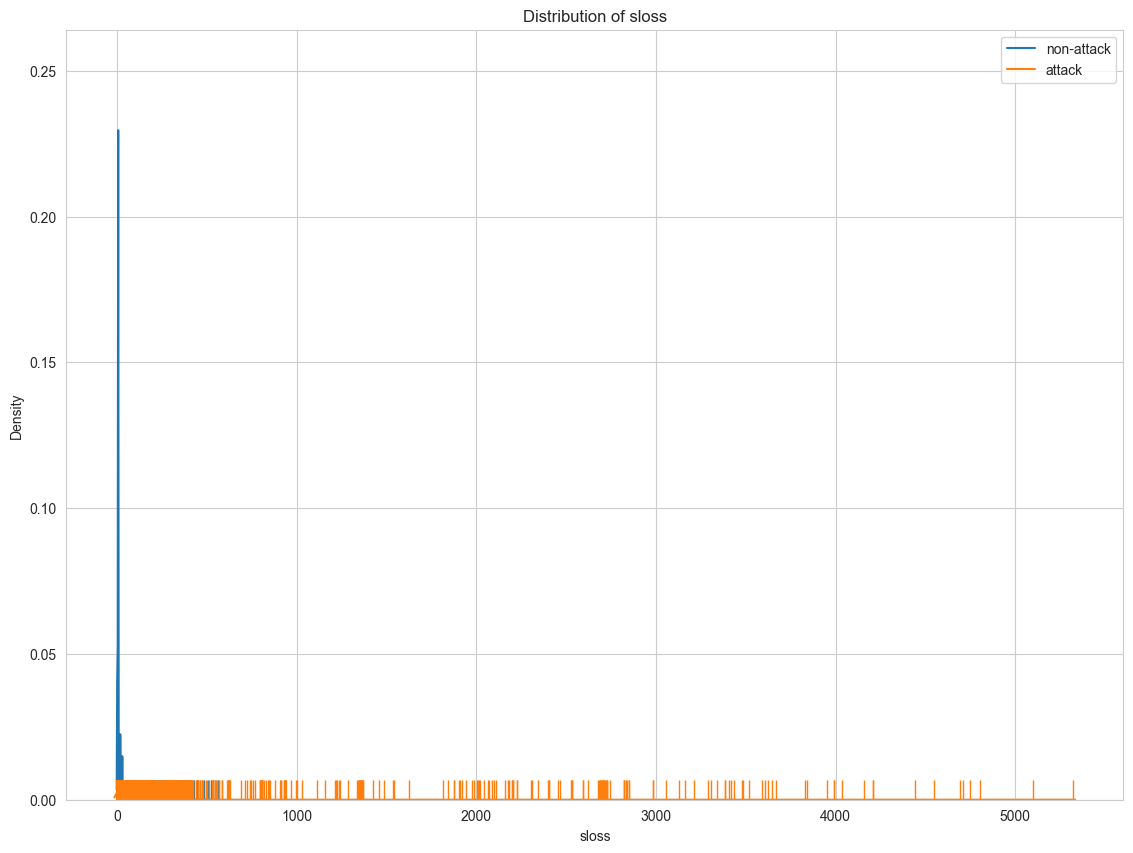

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sloss')

# Display the complete figure with both subplots
plt.show()

#### `dloss	Integer	Destination packets retransmitted or dropped`

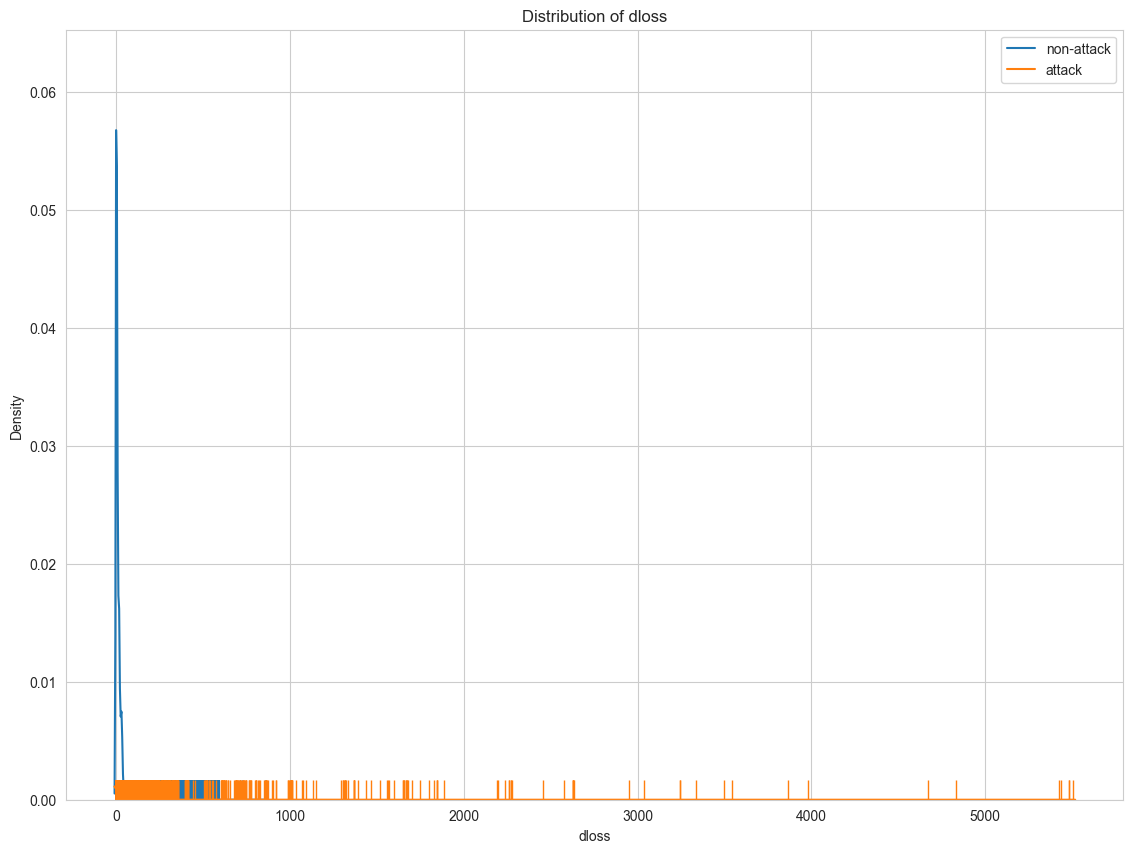

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dloss')

# Display the complete figure with both subplots
plt.show()

### `sload	Float	Source bits per second`

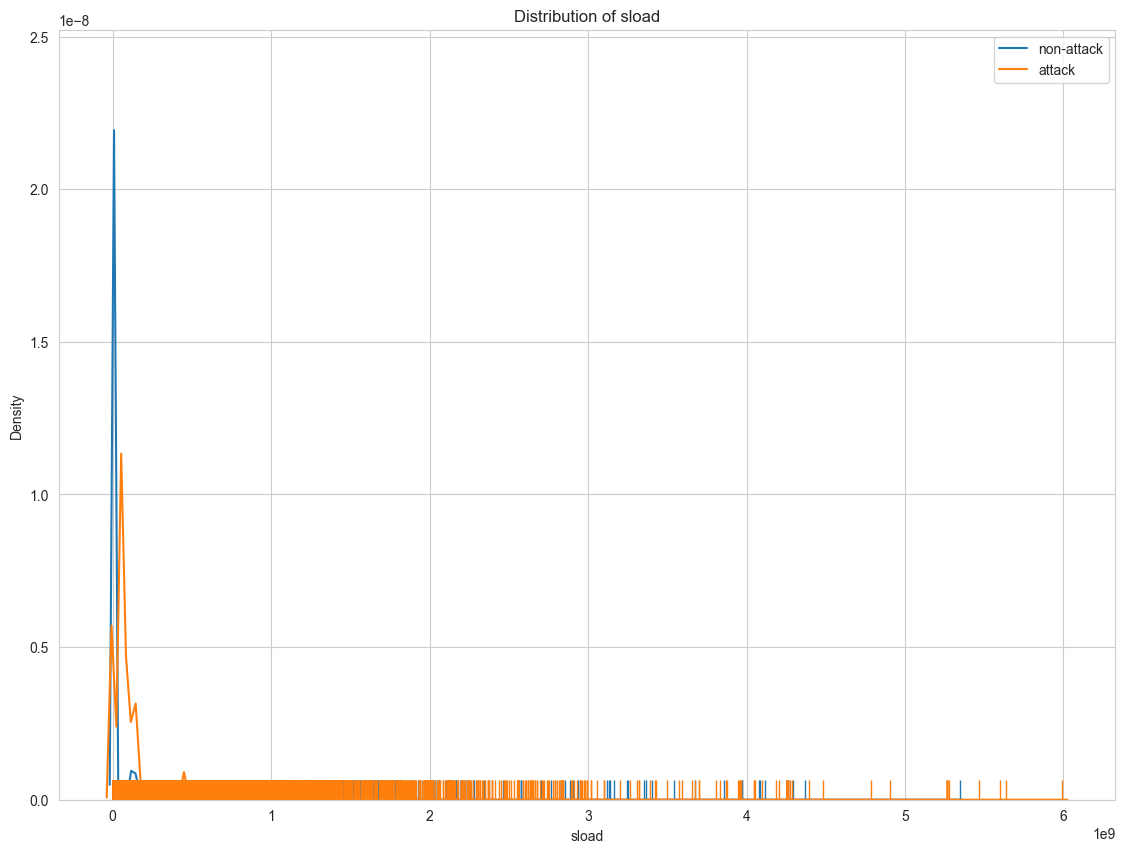

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sload')

# Display the complete figure 
plt.show()

#### `dload	Float	Destination bits per second`

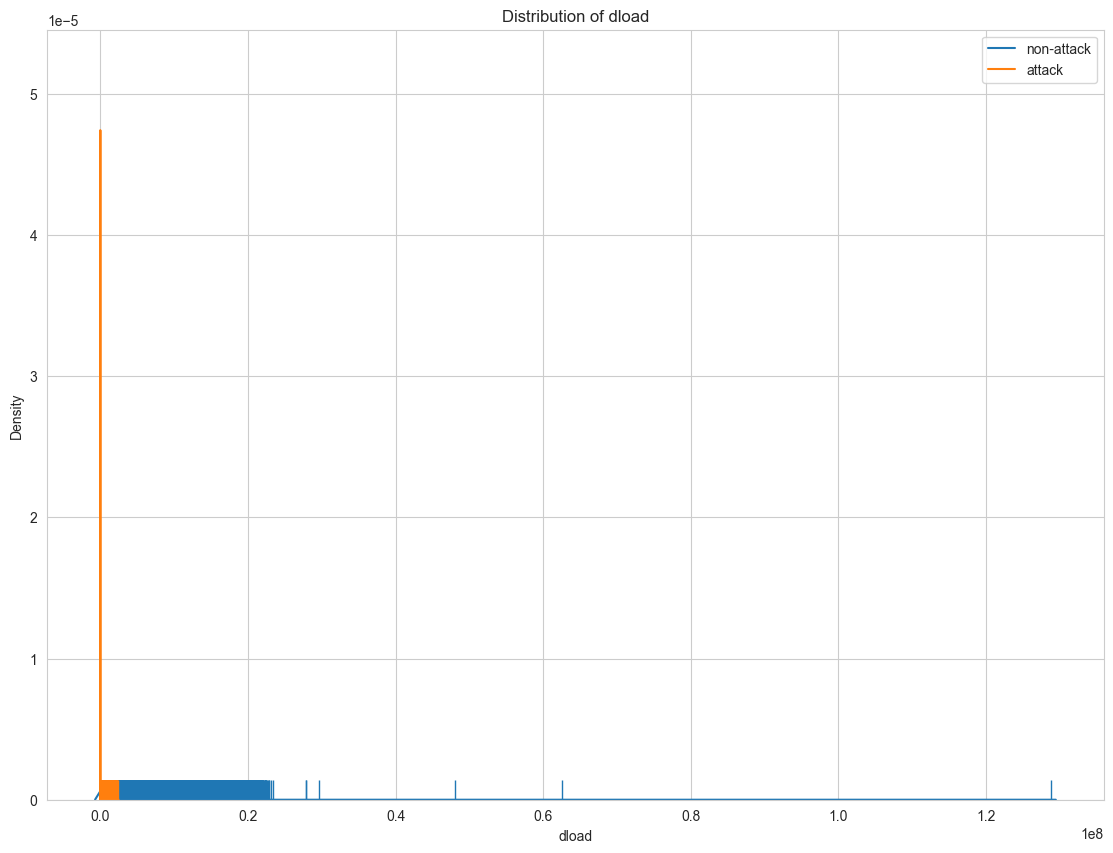

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dload')

# Display the complete figure 
plt.show()

#### `spkts	integer	Source to destination packet count`

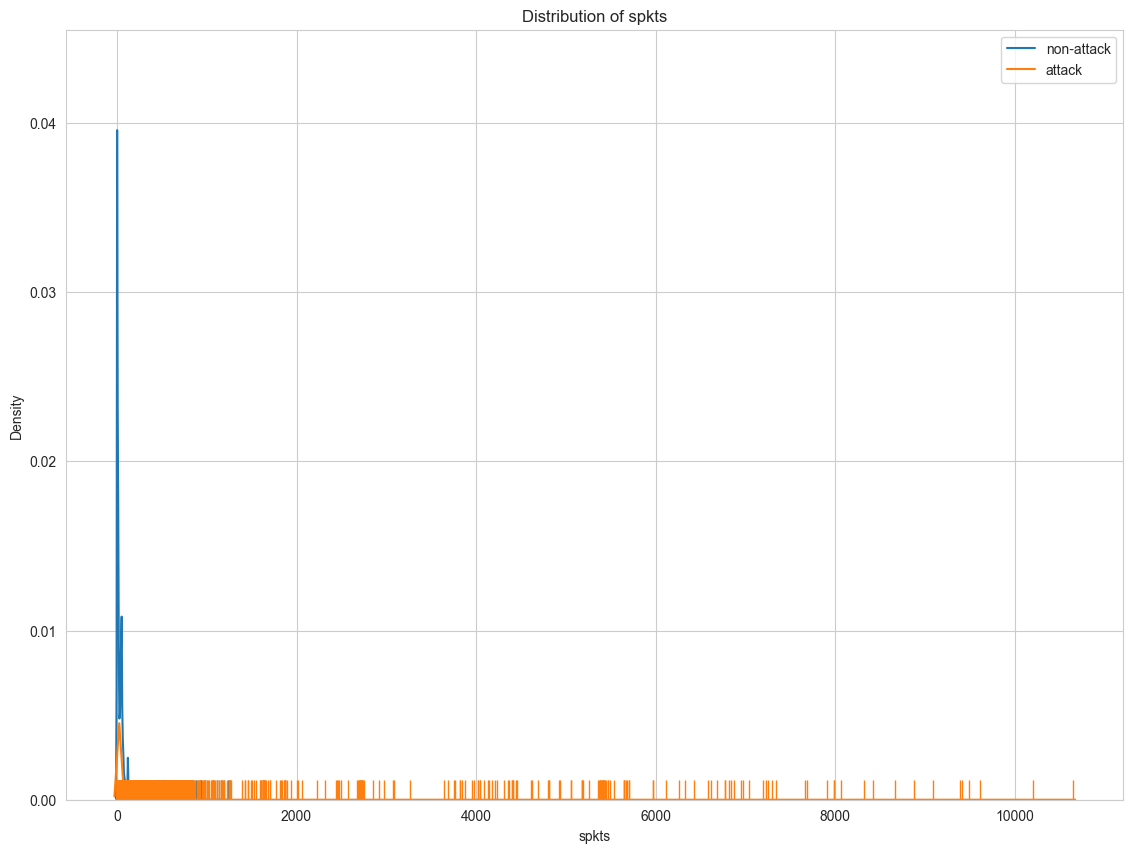

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('spkts')

# Display the complete figure 
plt.show()

####  `dpkts	integer	Destination to source packet count`

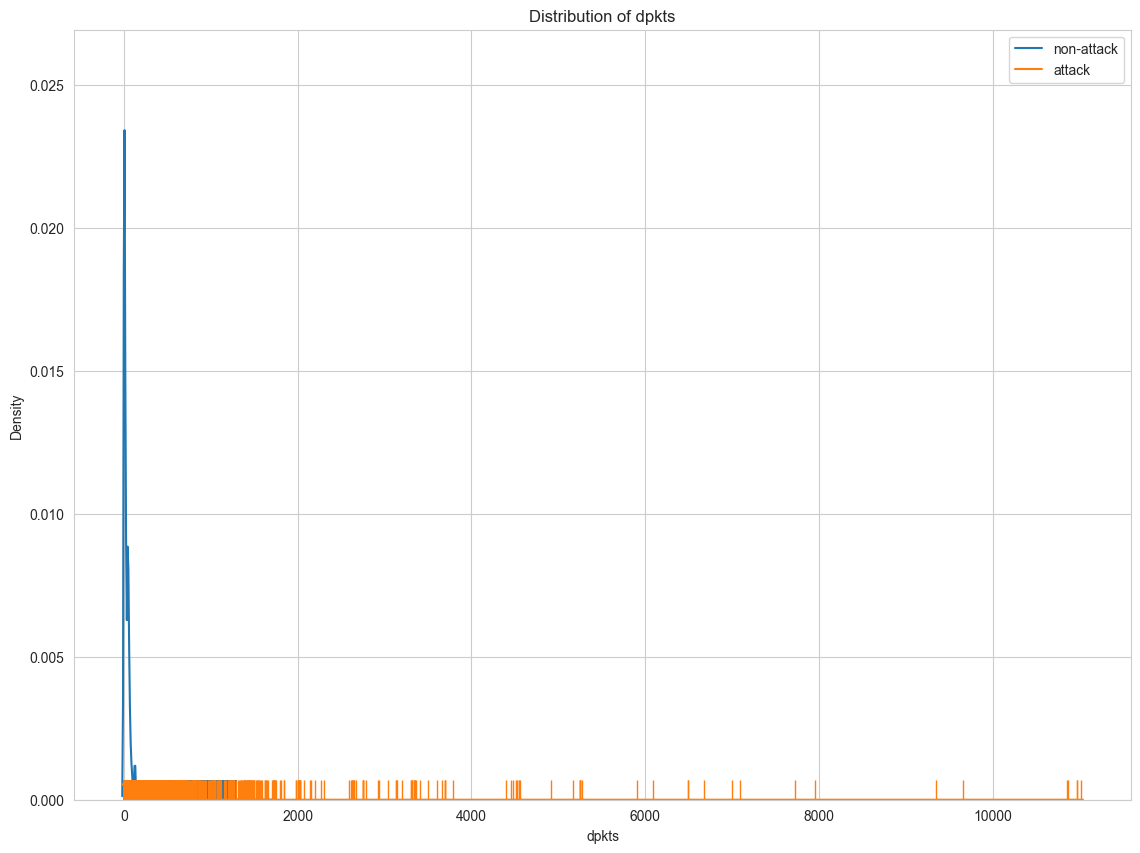

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dpkts')

# Display the complete figure 
plt.show()

#### `swin	integer	Source TCP window advertisement value`

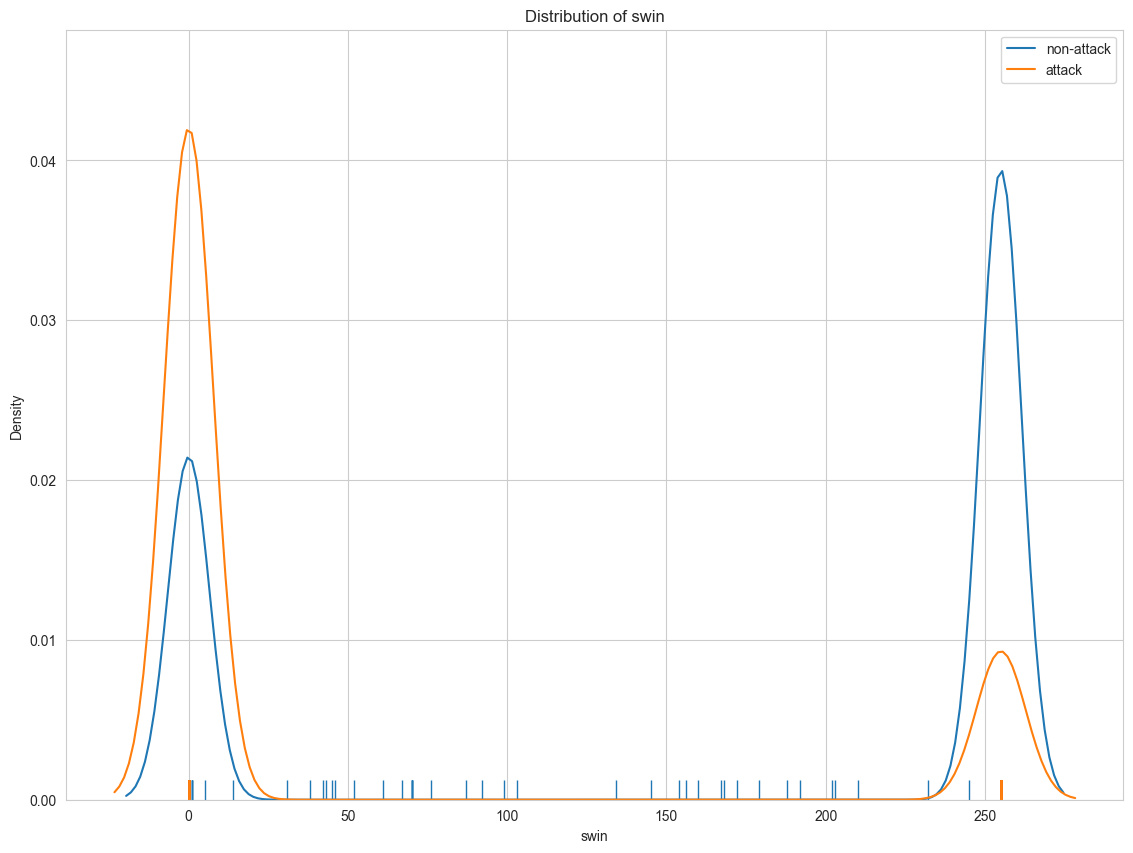

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('swin')

# Display the complete figure 
plt.show()

#### `dwin	integer	Destination TCP window advertisement value`

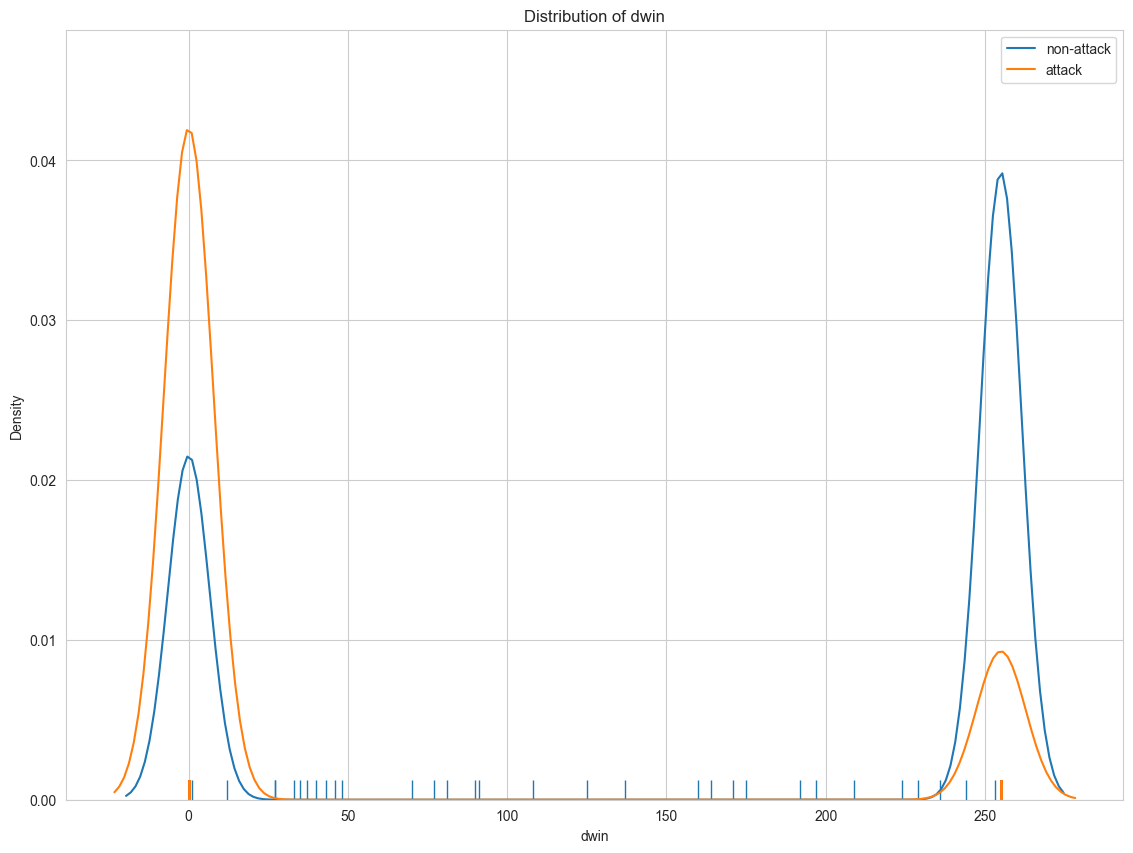

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dwin')

# Display the complete figure 
plt.show()

#### `stcpb	integer	Source TCP base sequence number`

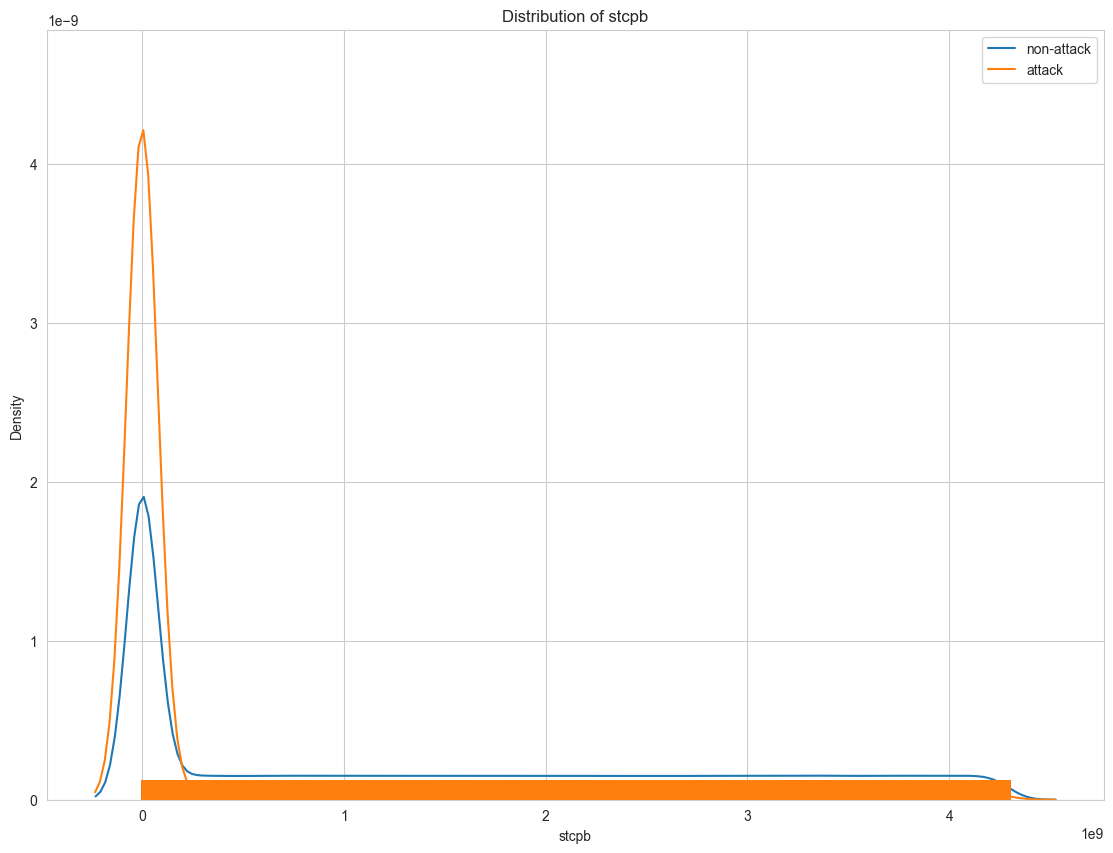

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('stcpb')

# Display the complete figure 
plt.show()

#### `dtcpb	integer	Destination TCP base sequence number`

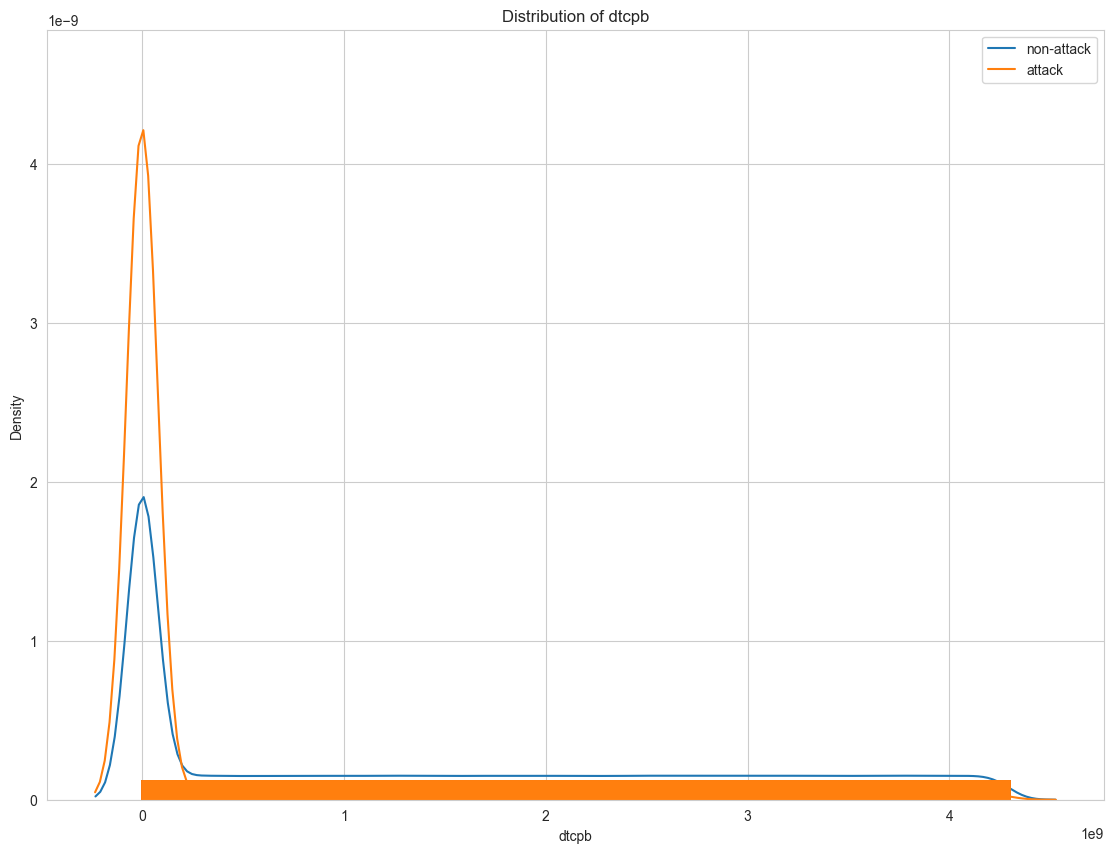

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dtcpb')

# Display the complete figure 
plt.show()

#### `smeansz	integer	Mean of the How packet size transmitted by the...`

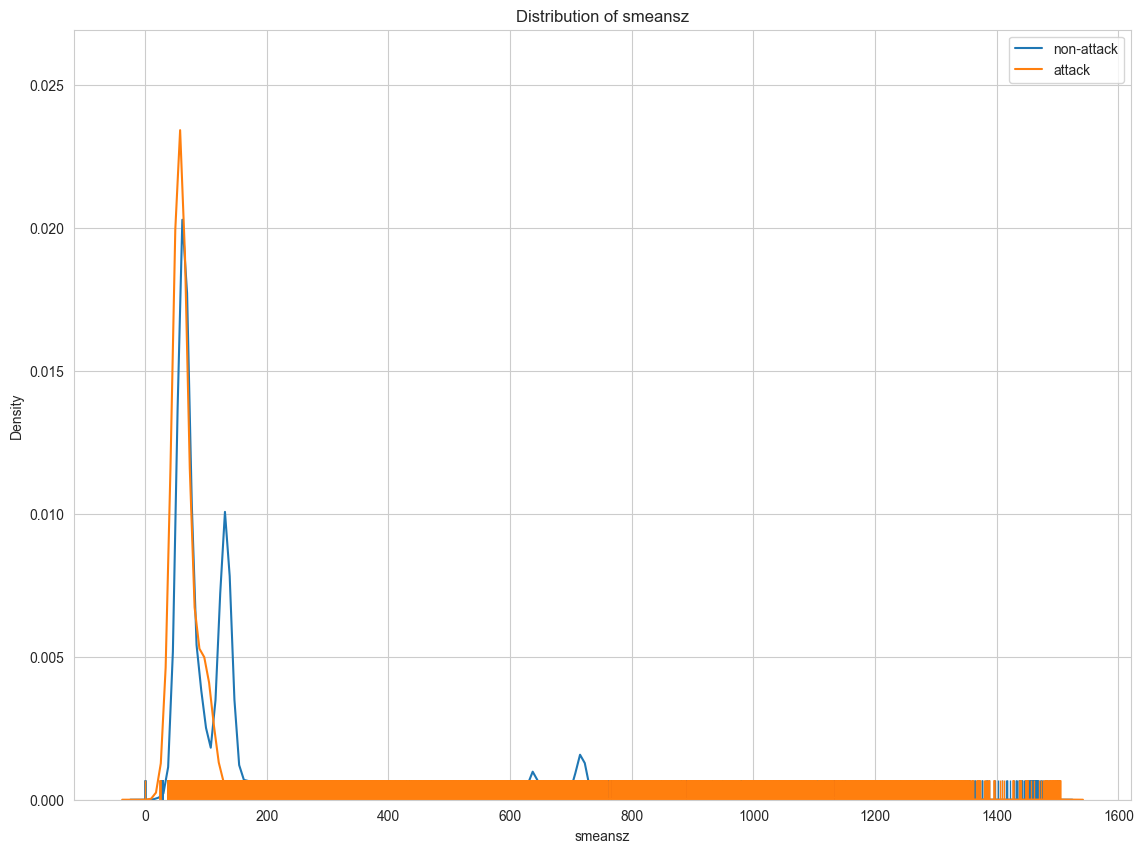

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('smeansz')

# Display the complete figure 
plt.show()

#### `dmeansz	integer	Mean of the How packet size transmitted by the...`

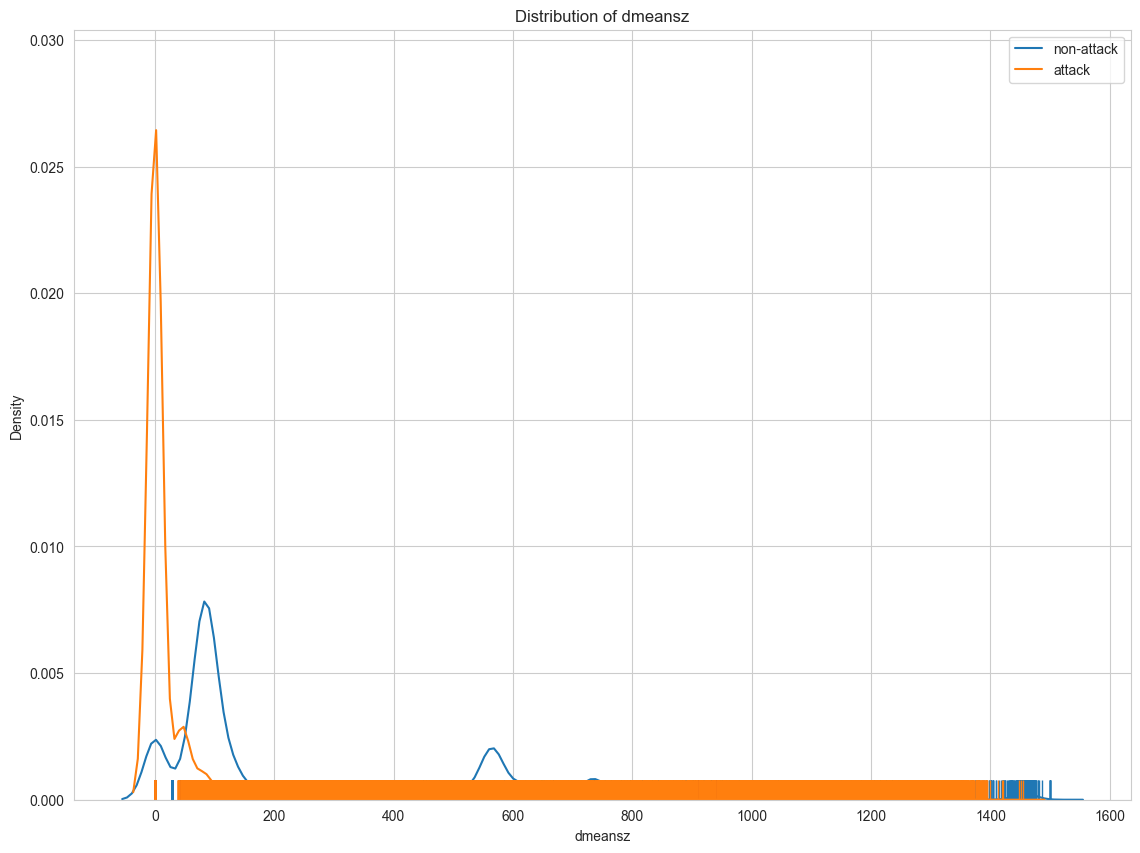

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dmeansz')

# Display the complete figure 
plt.show()

#### `trans_depth	integer	Represents the pipelined depth into the connec...`

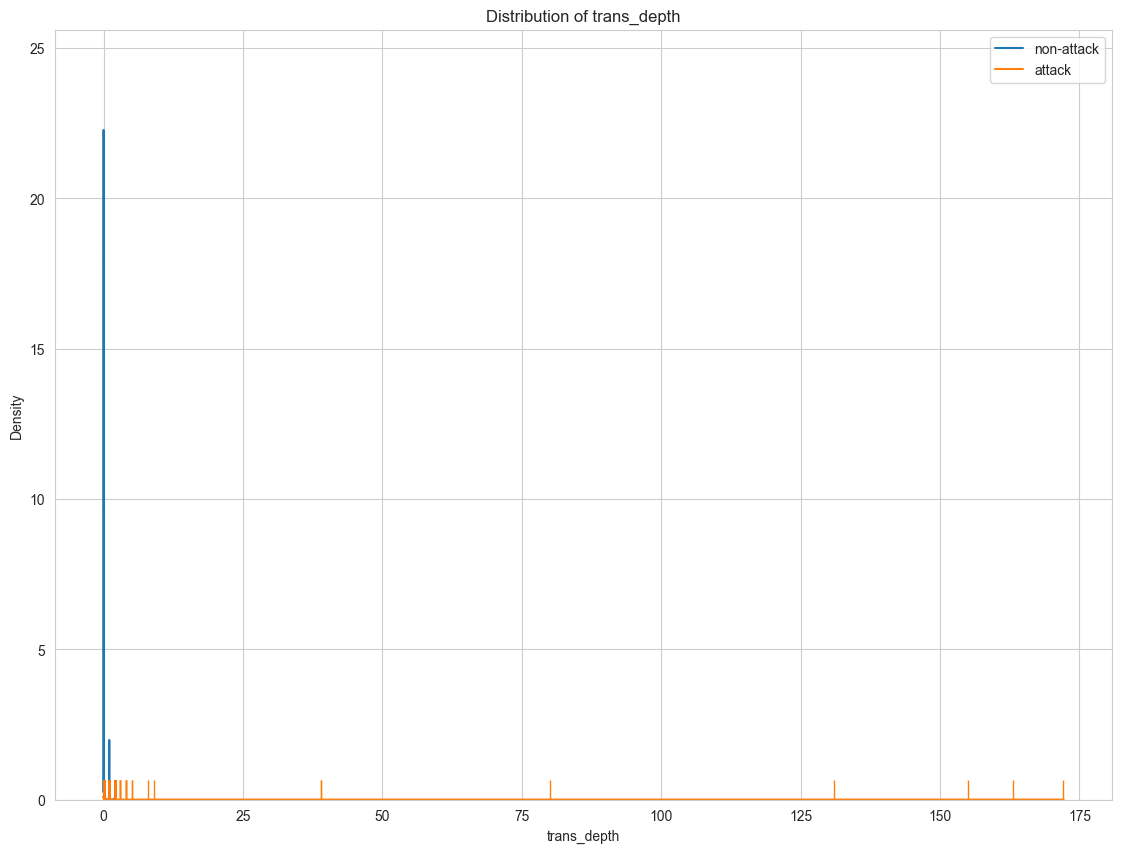

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('trans_depth')

# Display the complete figure 
plt.show()

#### `res_bdy_len	integer	Actual uncompressed content size of the data t...`

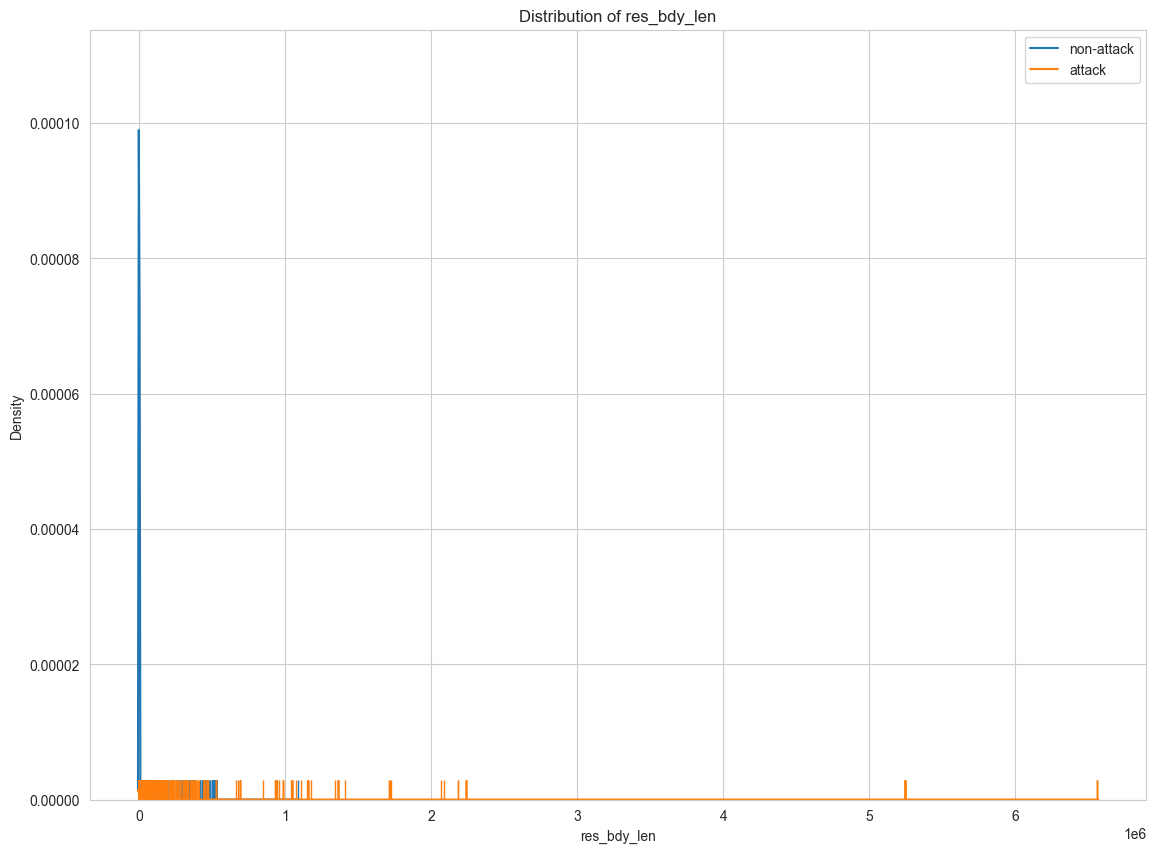

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('res_bdy_len')

# Display the complete figure 
plt.show()

#### `sjit	Float	Source jitter (mSec)`

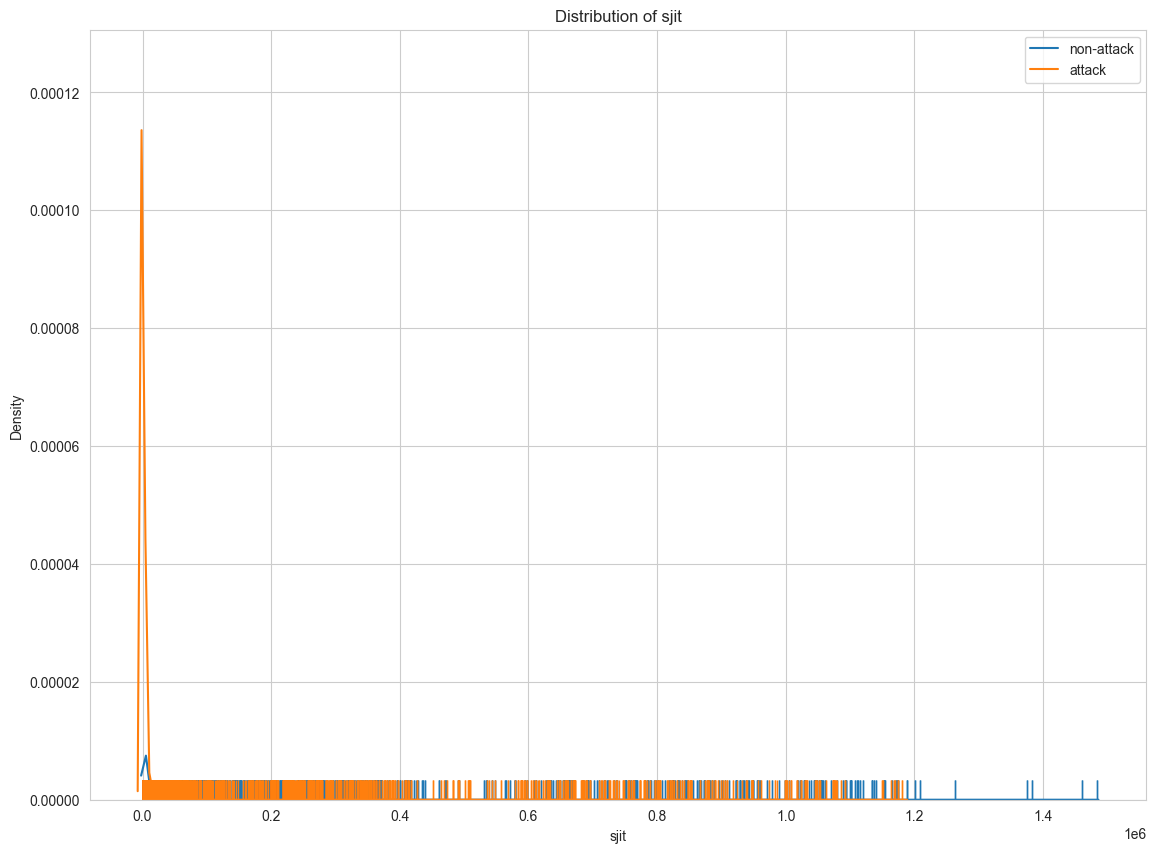

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sjit')

# Display the complete figure
plt.show()

#### `djit	Float	Destination jitter (mSec)`

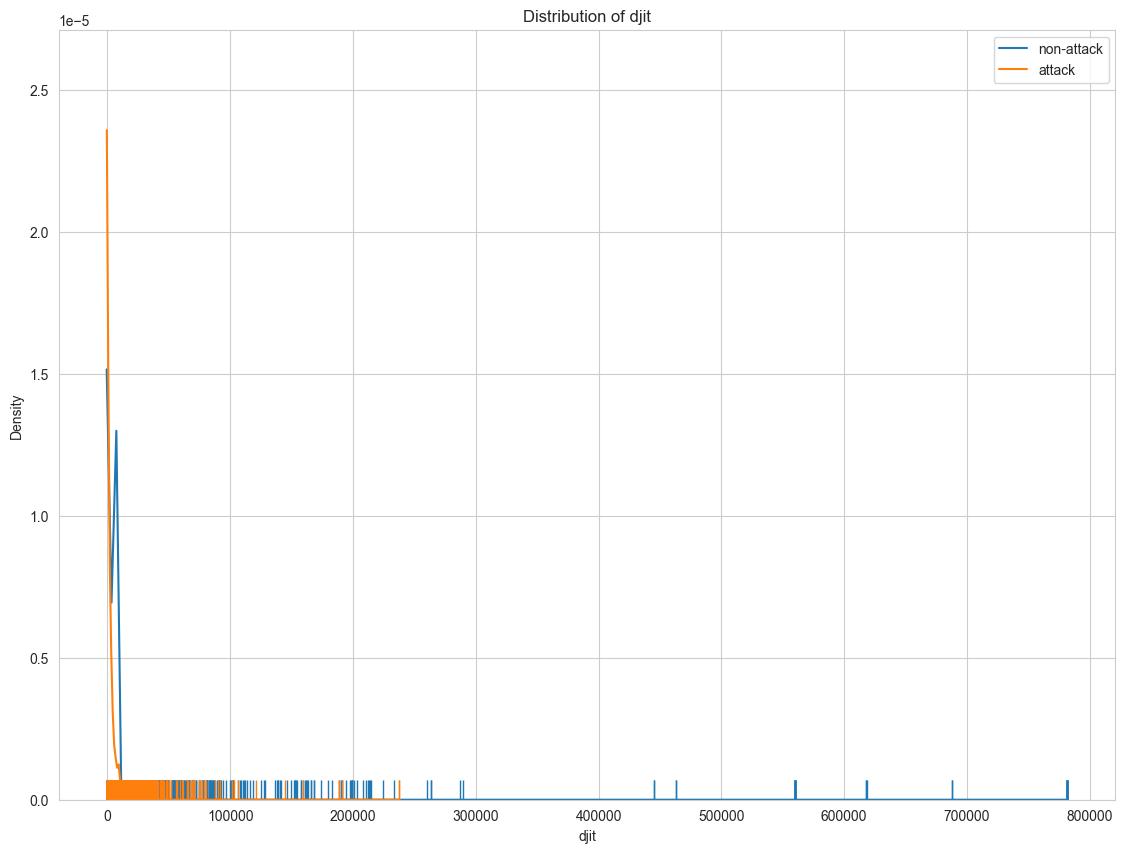

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('djit')

# Display the complete figure 
plt.show()

#### `stime	Timestamp	record start time`

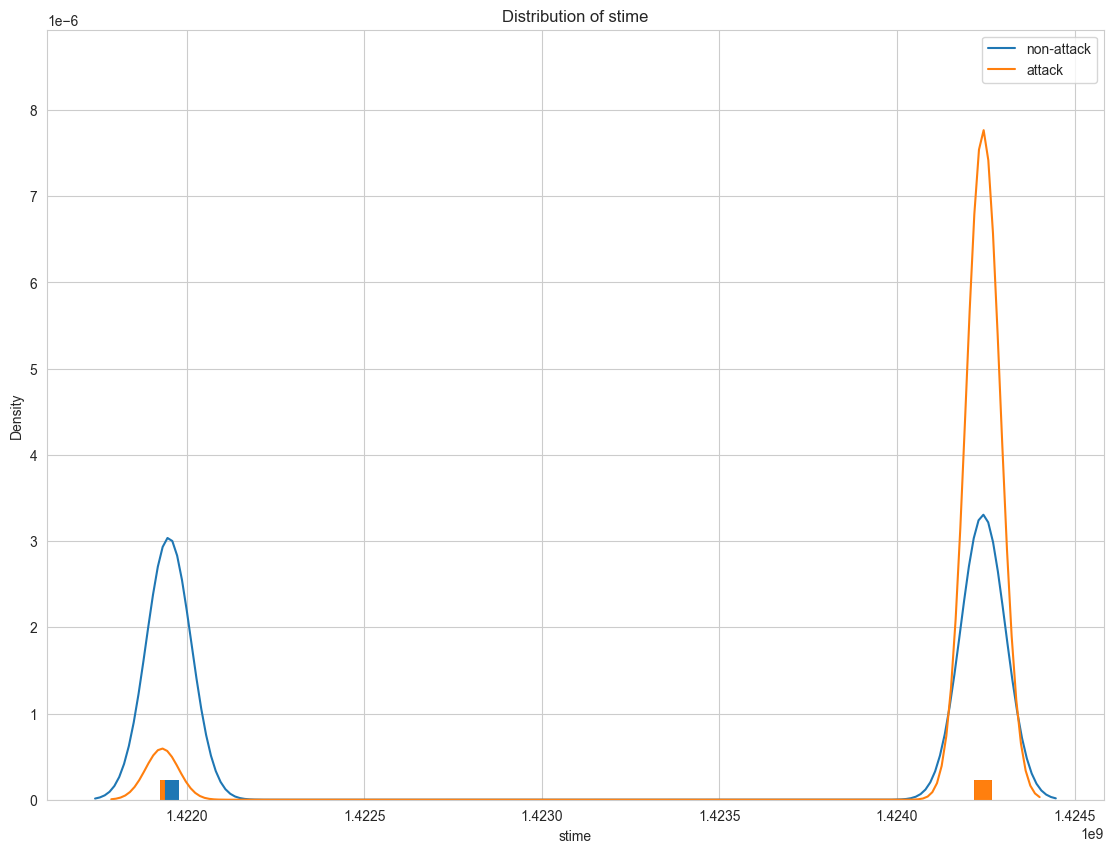

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('stime')

# Display the complete figure 
plt.show()

#### `ltime	Timestamp	record last time`

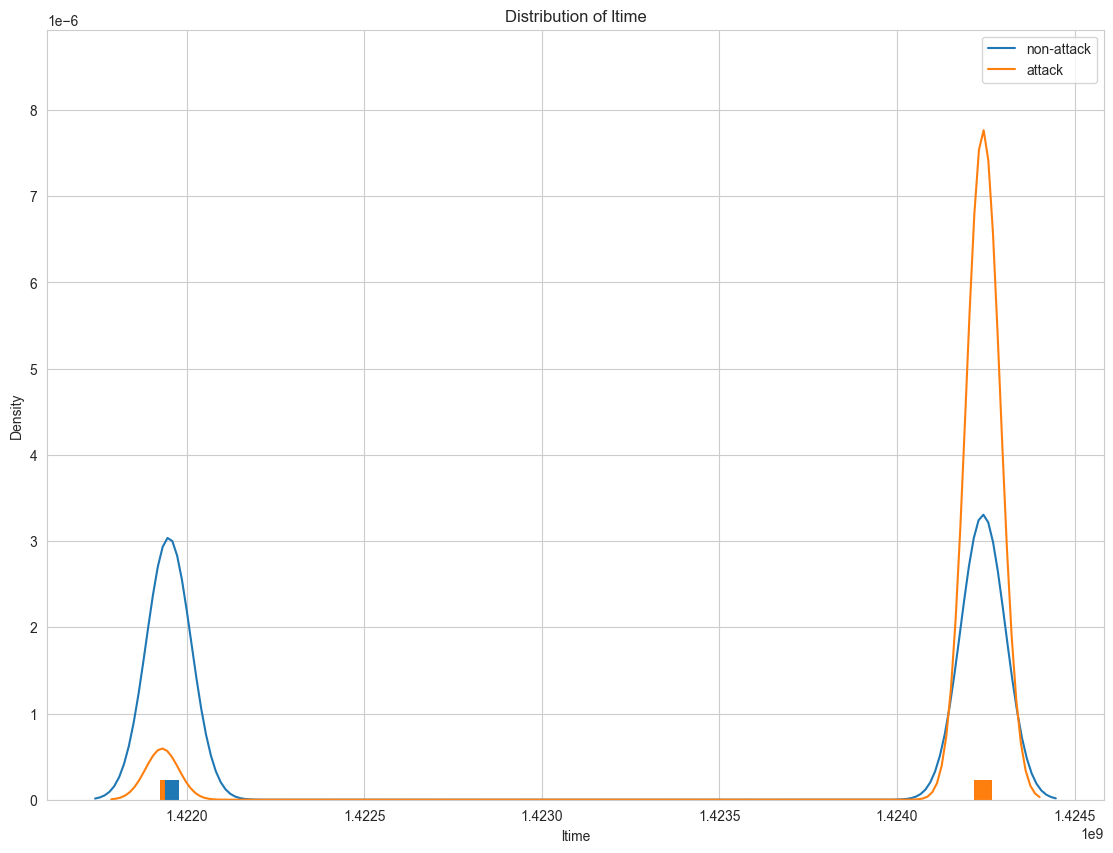

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ltime')

# Display the complete figure 
plt.show()

#### `sintpkt	Float	Source interpacket arrival time (mSec)`

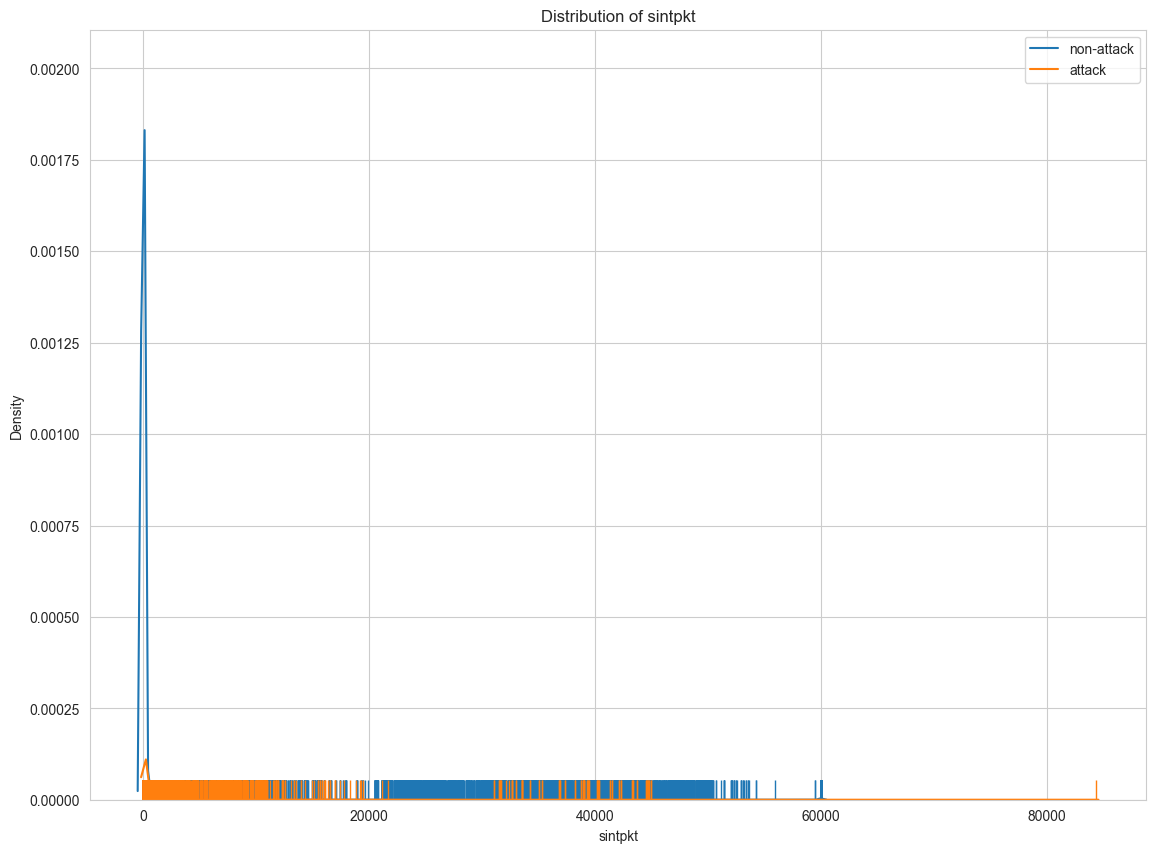

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('sintpkt')

# Display the complete figure 
plt.show()

#### `dintpkt	Float	Destination interpacket arrival time (mSec)`

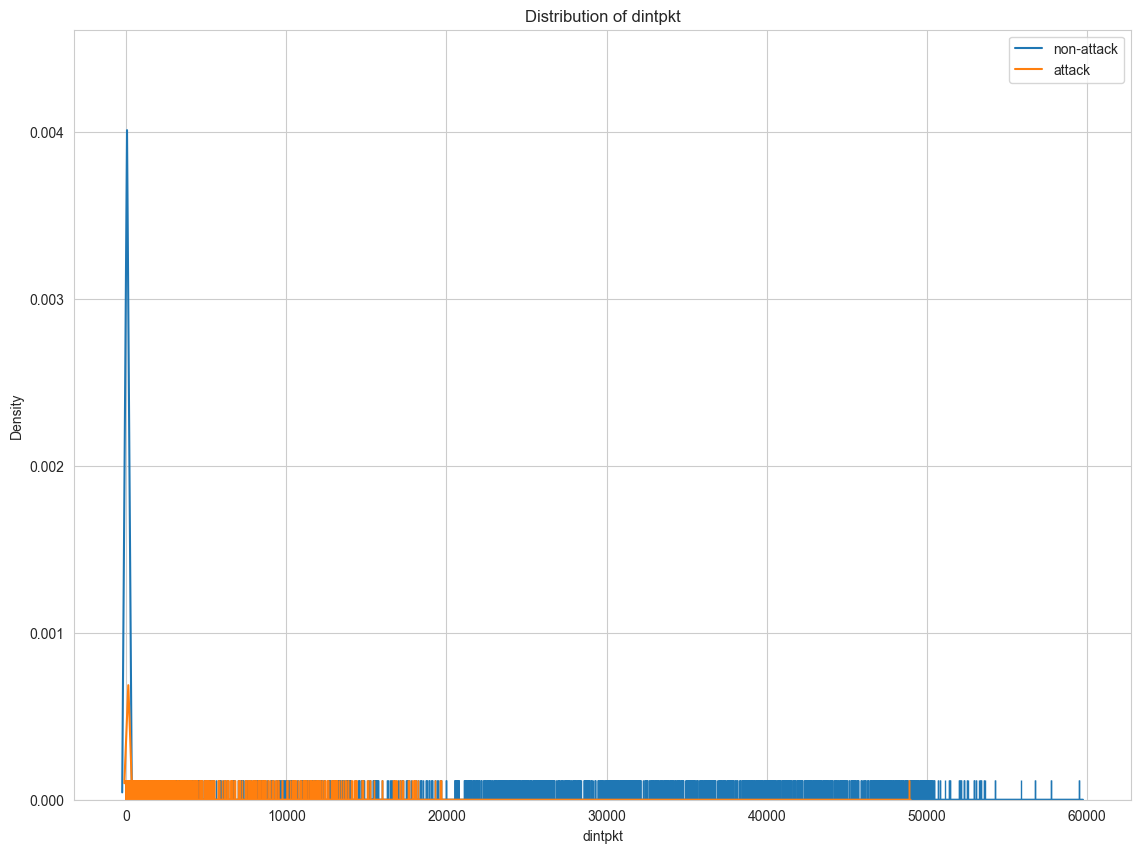

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('dintpkt')

# Display the complete figure 
plt.show()

#### `tcprtt	Float	TCP connection setup round-trip time, the sum ...`

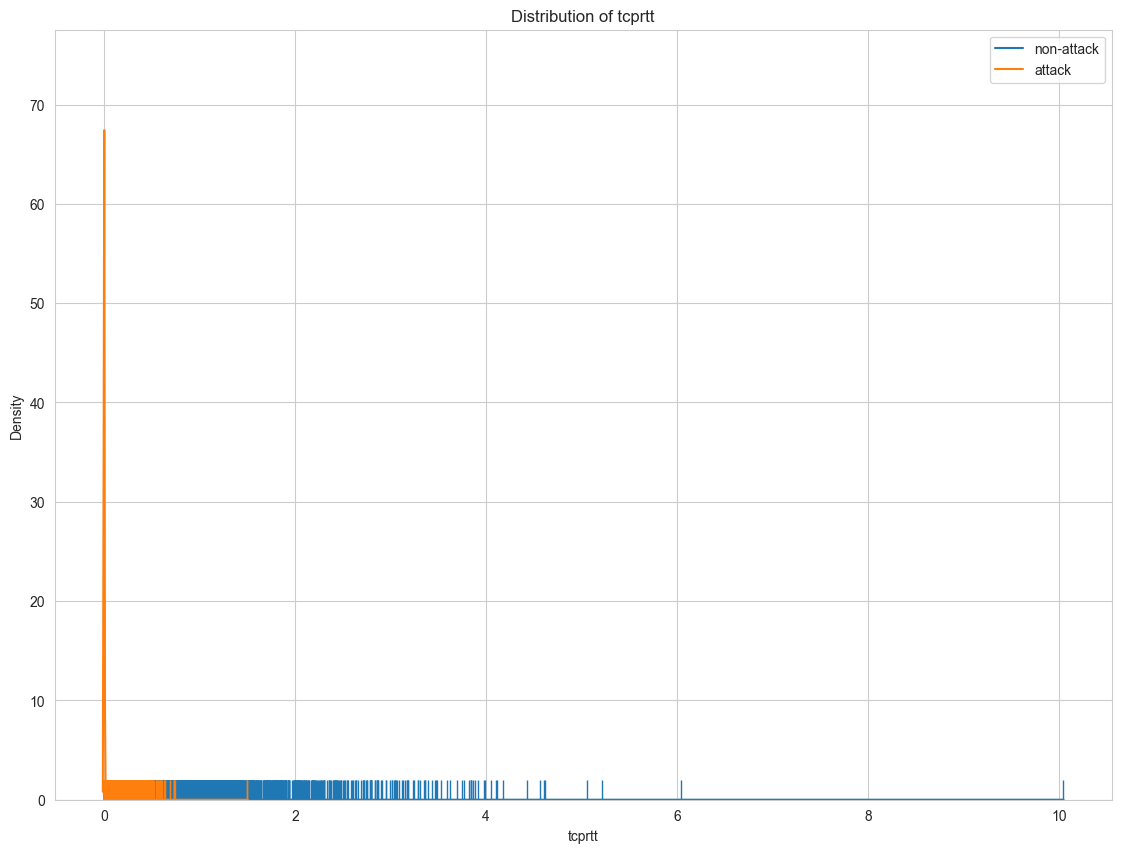

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('tcprtt')

# Display the complete figure 
plt.show()

#### `synack	Float	TCP connection setup time, the time between th...`

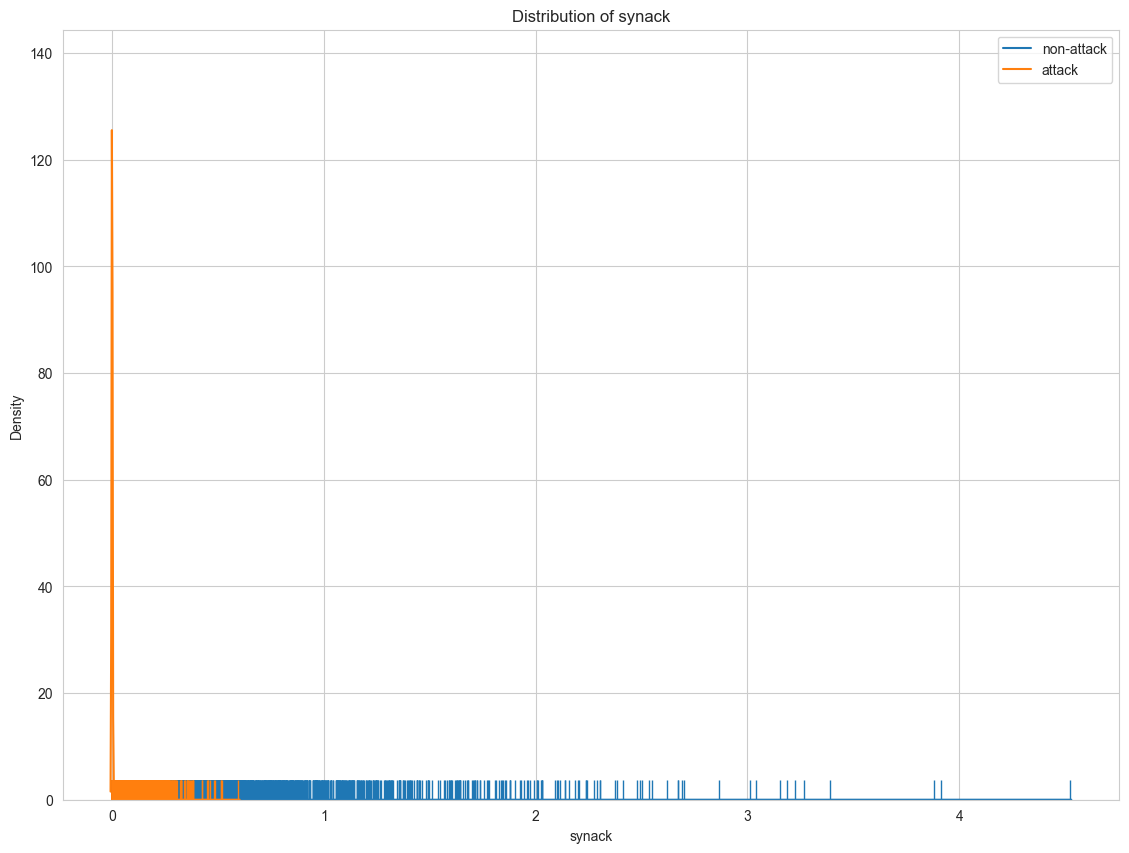

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('synack')

# Display the complete figure 
plt.show()

#### `ackdat	Float	TCP connection setup time, the time between th...`

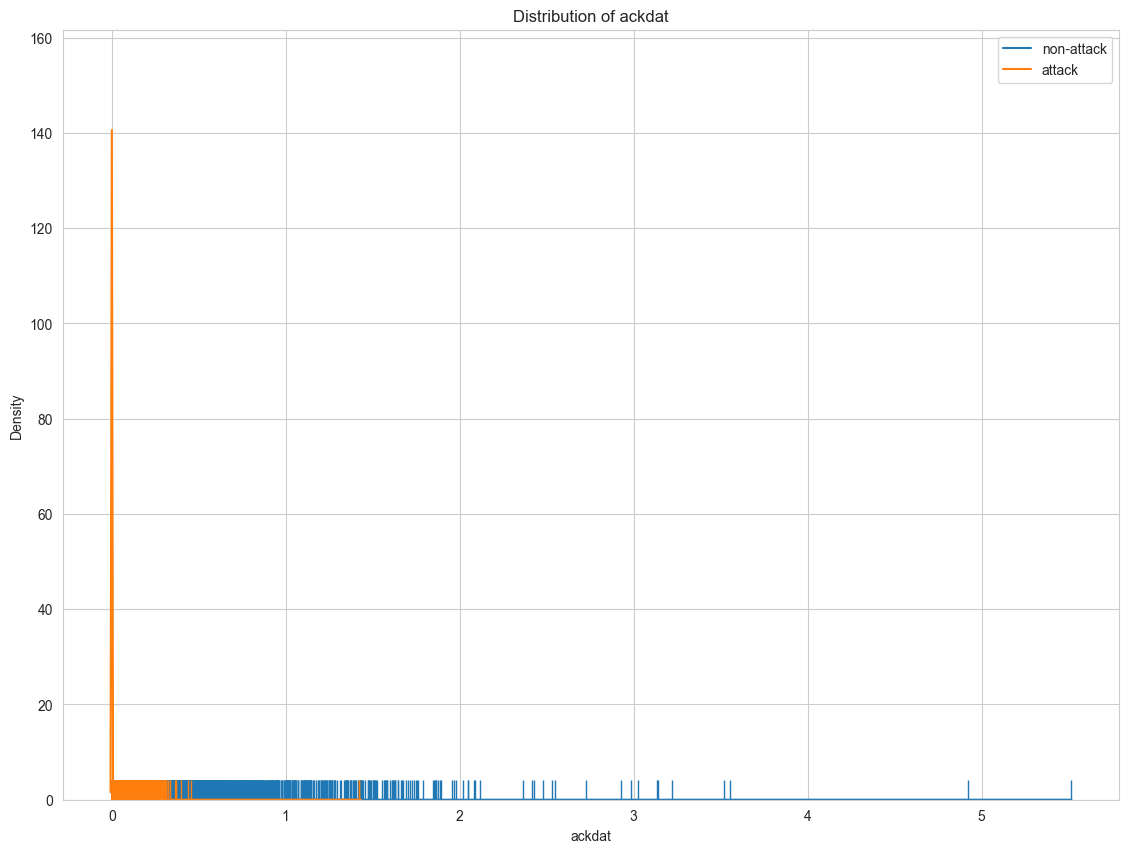

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ackdat')

# Display the complete figure 
plt.show()

#### `s_sm_ips_ports	Binary	If source (1) and destination (3)IP addresses ...`

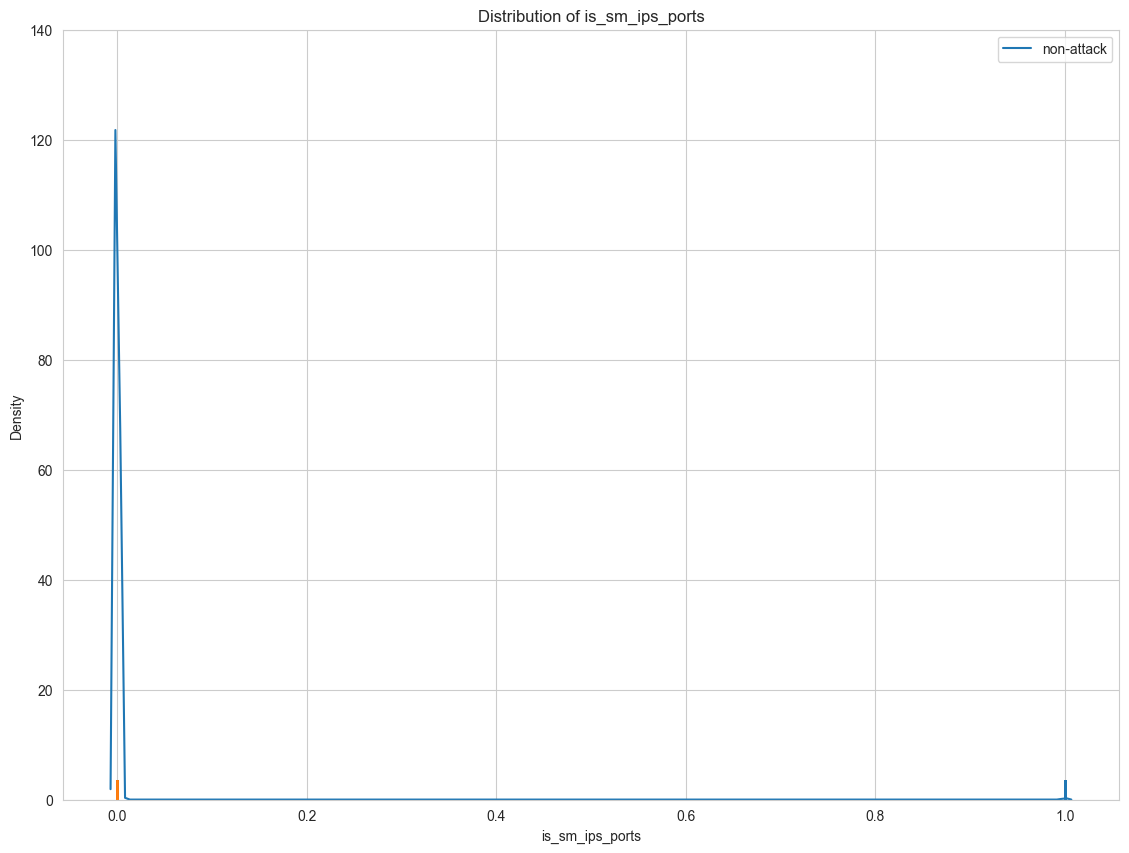

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('is_sm_ips_ports')

# Display the complete figure 
plt.show()

#### `ct_state_ttl	Integer	No. for each state (6) according to specific r...`

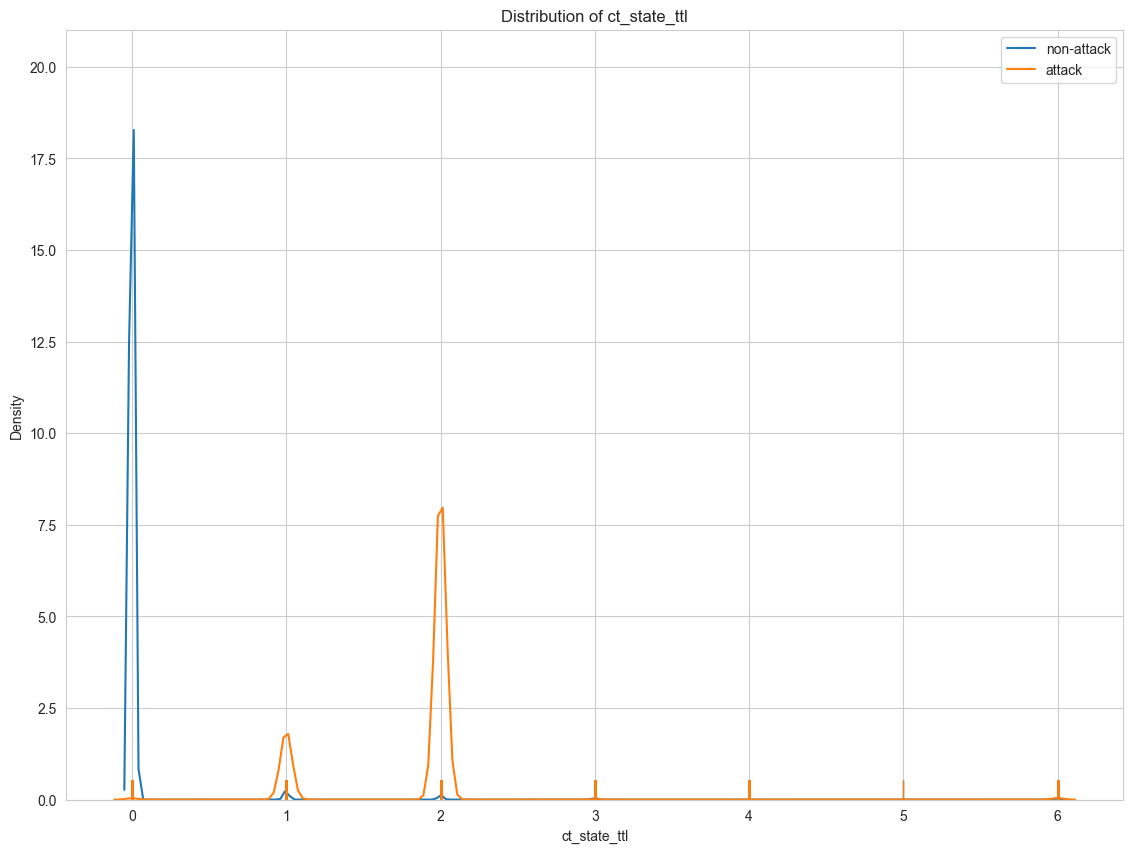

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_state_ttl')

# Display the complete figure 
plt.show()

#### `ct_flw_http_mthd	Integer	No. of flows that has methods such as Get and ...`

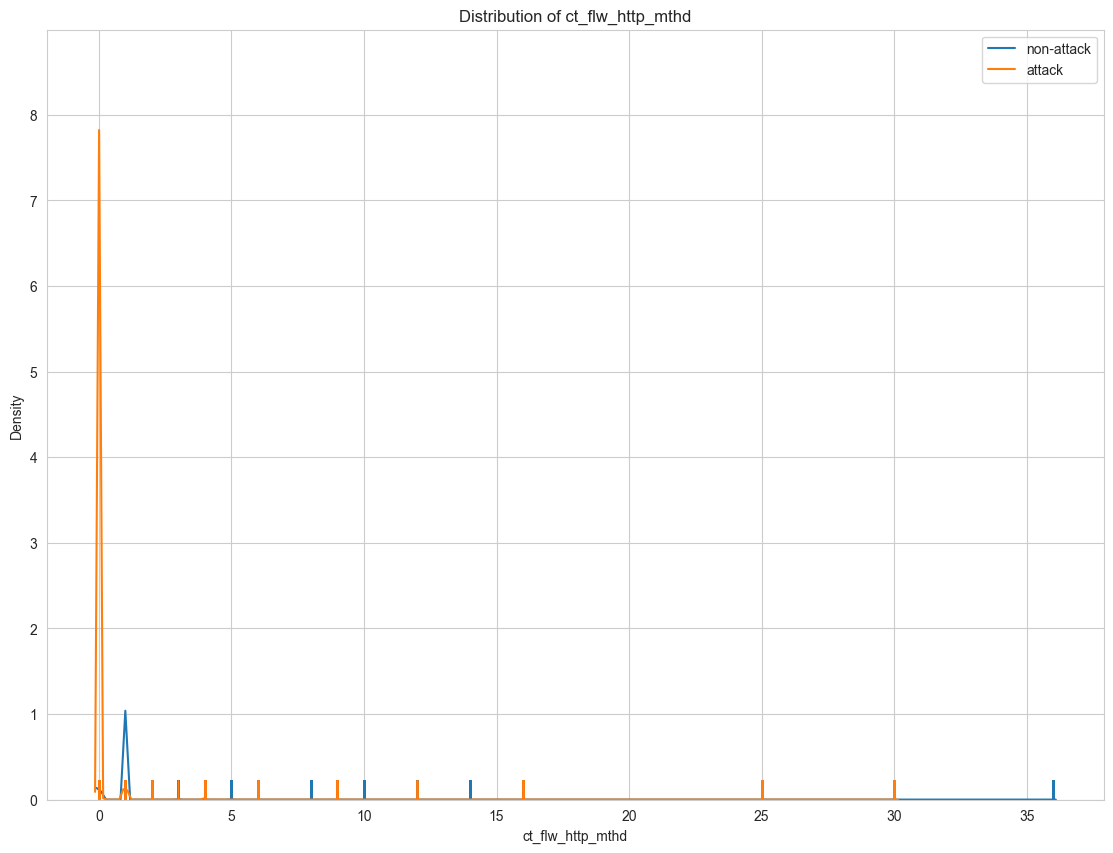

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_flw_http_mthd')

# Display the complete figure
plt.show()

#### `is_ftp_login	Binary	If the ftp session is accessed by user and pas...`

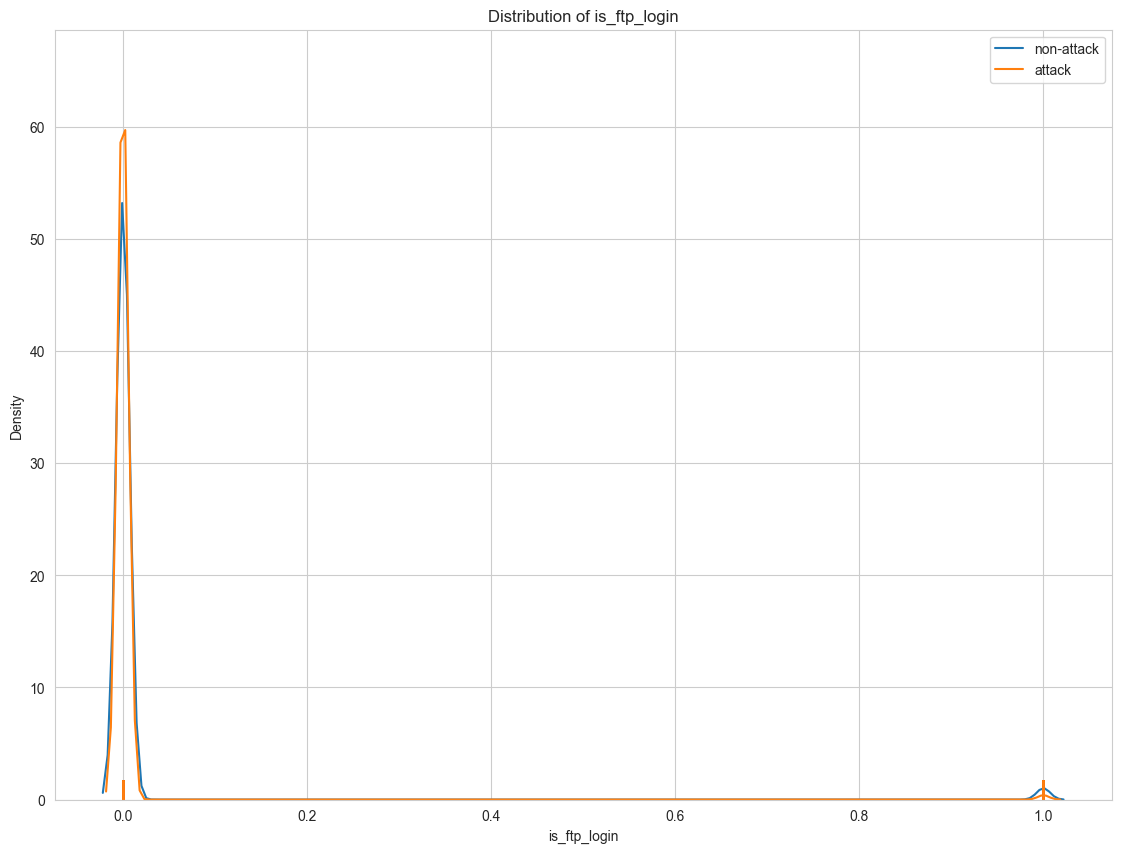

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('is_ftp_login')

# Display the complete figure 
plt.show()

#### `ct_ftp_cmd	integer	No of flows that has a command in ftp session.`

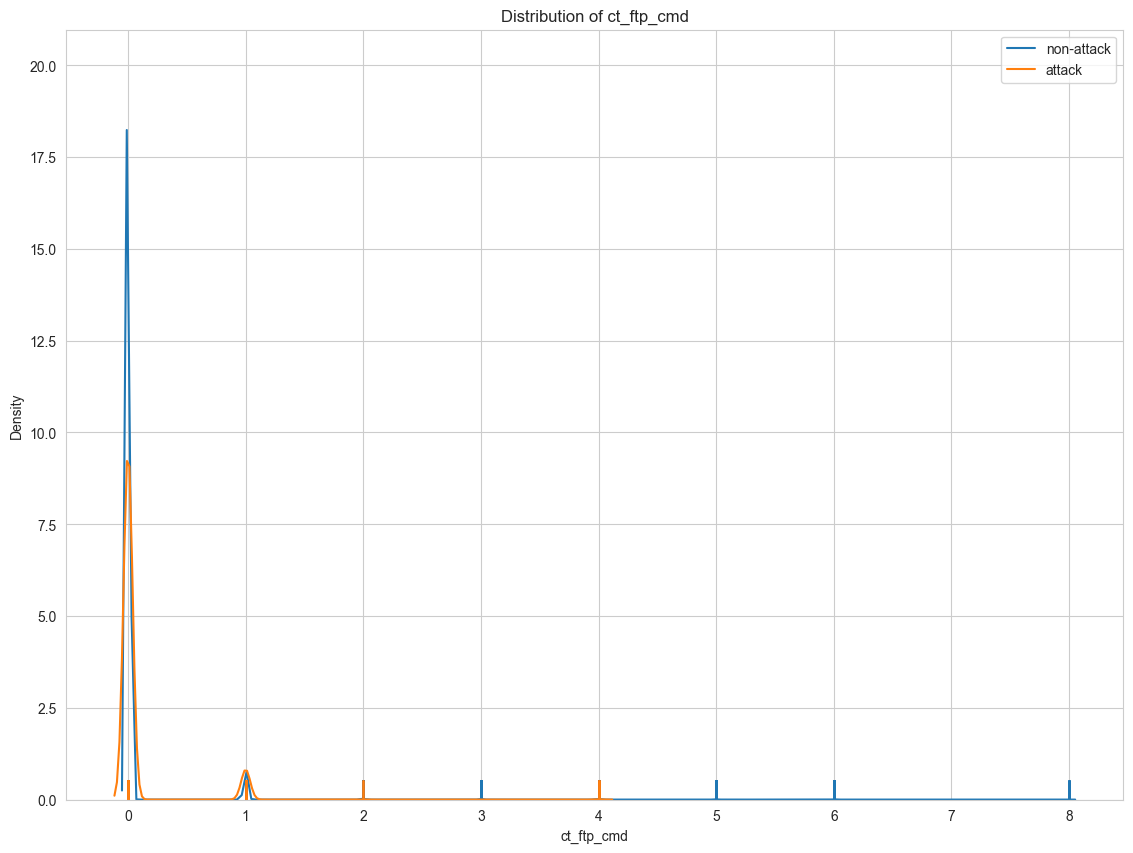

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_ftp_cmd')

# Display the complete figure
plt.show()

#### `ct_srv_src	integer	No. of connections that contain the same servi...`

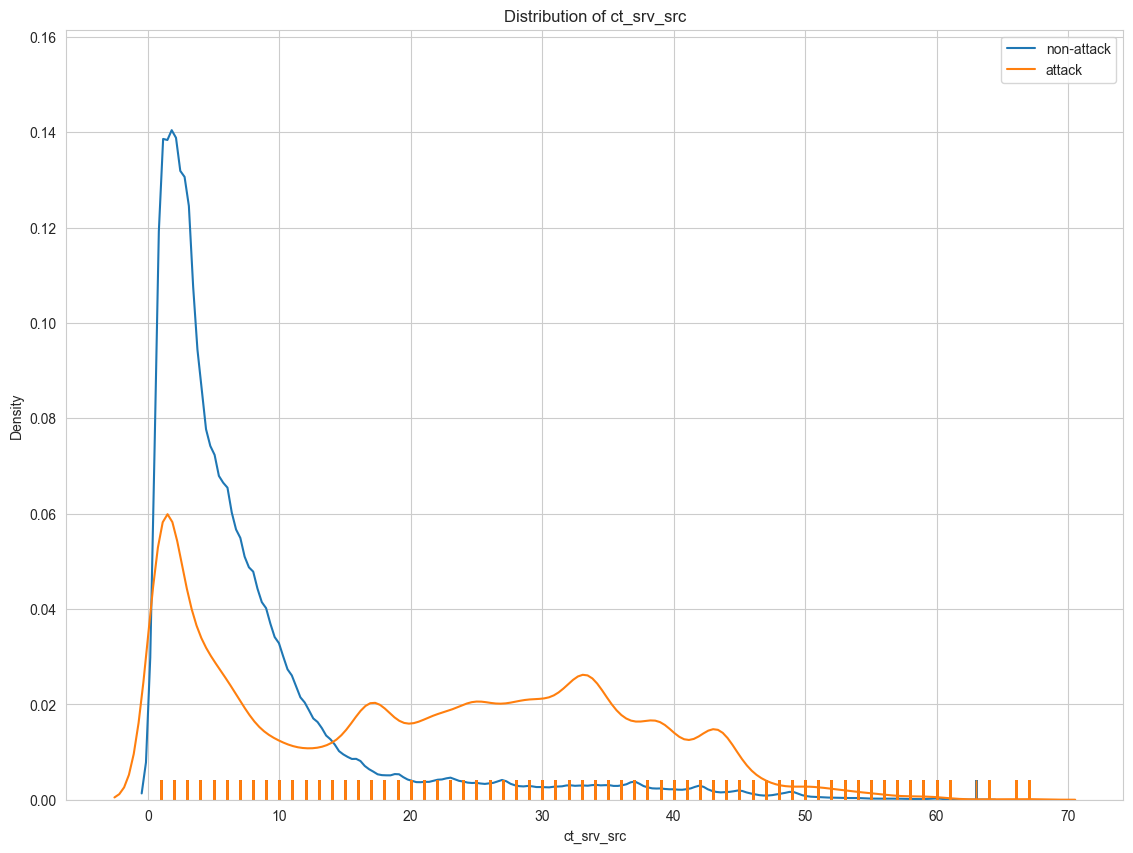

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_srv_src')

# Display the complete figure 
plt.show()

#### `ct_srv_dst	integer	No. of connections that contain the same servi...`

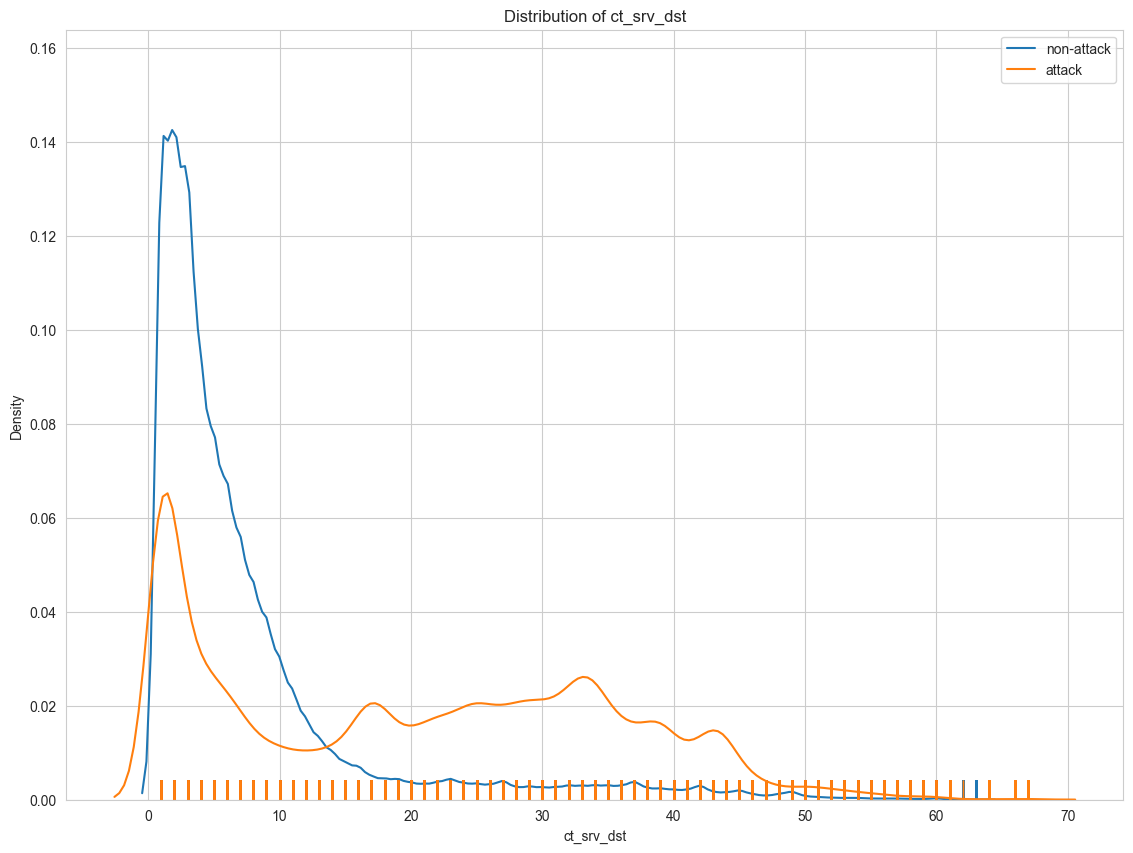

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Create plot
# Plot feature distribution for attack and non-attack data
pdf_plot('ct_srv_dst')

# Display the complete figure 
plt.show()

#### `ct_dst_ltm	integer	No. of connections of the same destination add...`

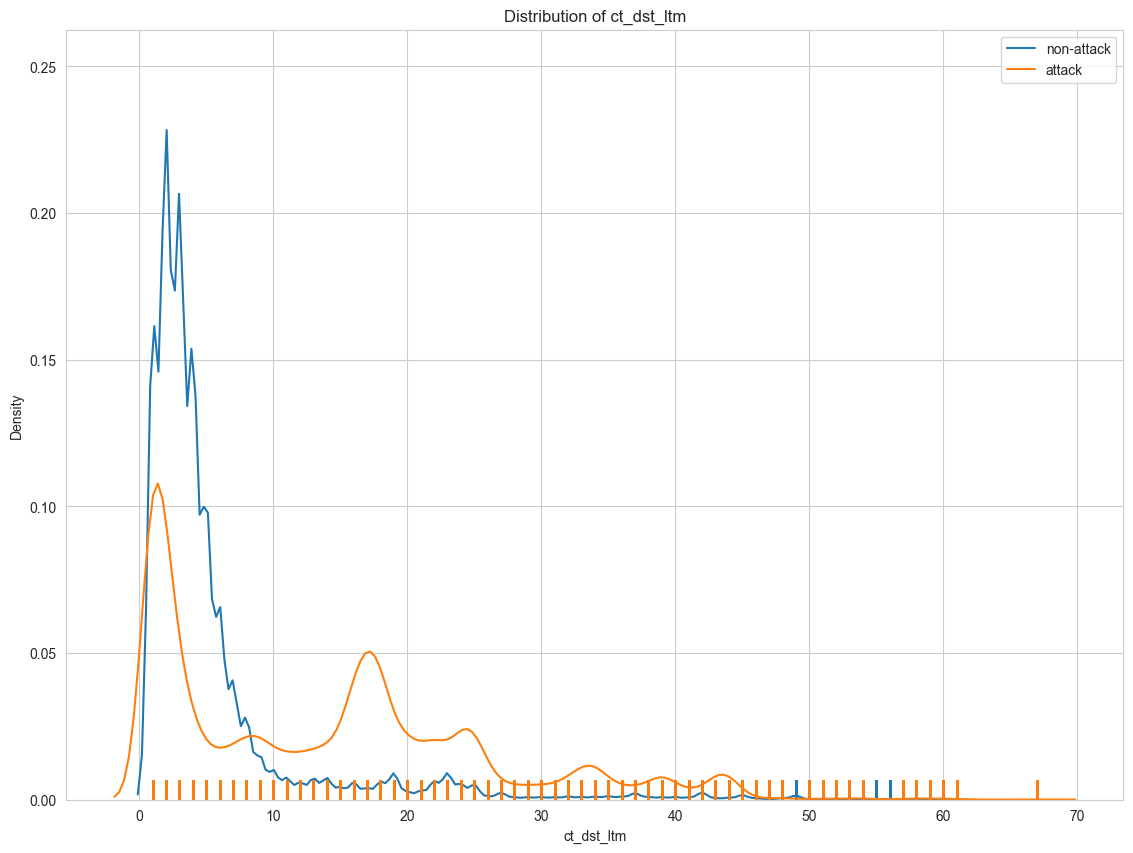

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_dst_ltm')

# Display the complete figure 
plt.show()

#### `ct_src_ltm	integer	No. of connections of the same source address ...`

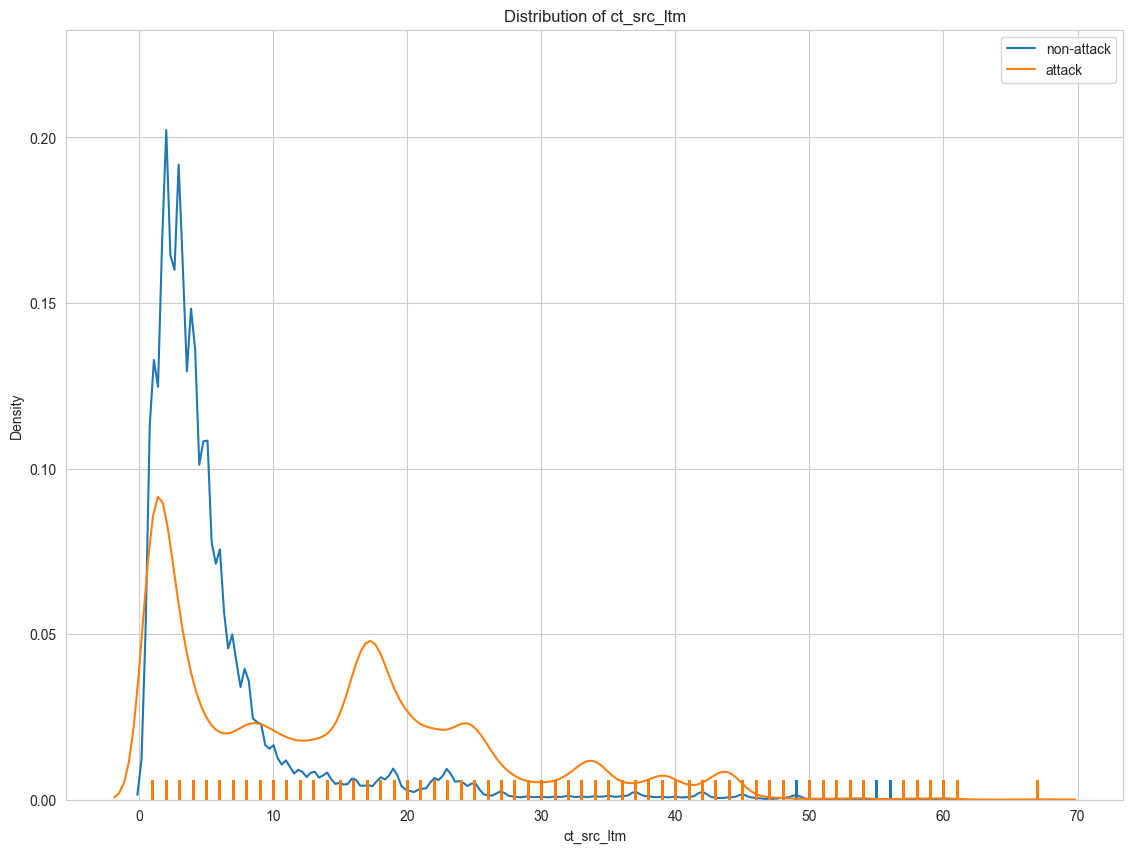

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_src_ltm')

# Display the complete figure 
plt.show()

#### `ct_src_dport_ltm	integer	No of connections of the same source address (...`

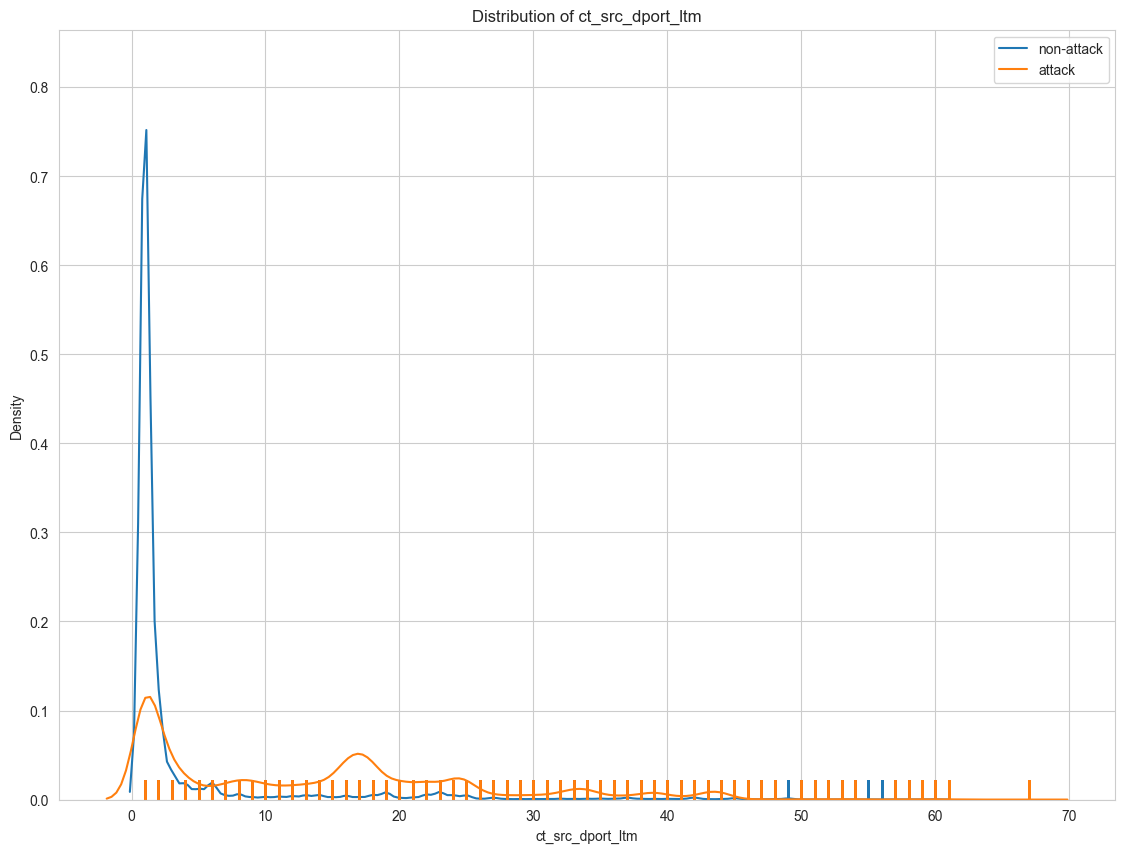

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_src_dport_ltm')

# Display the complete figure 
plt.show()

#### `ct_dst_sport_ltm	integer	No of connections of the same destination addr...`

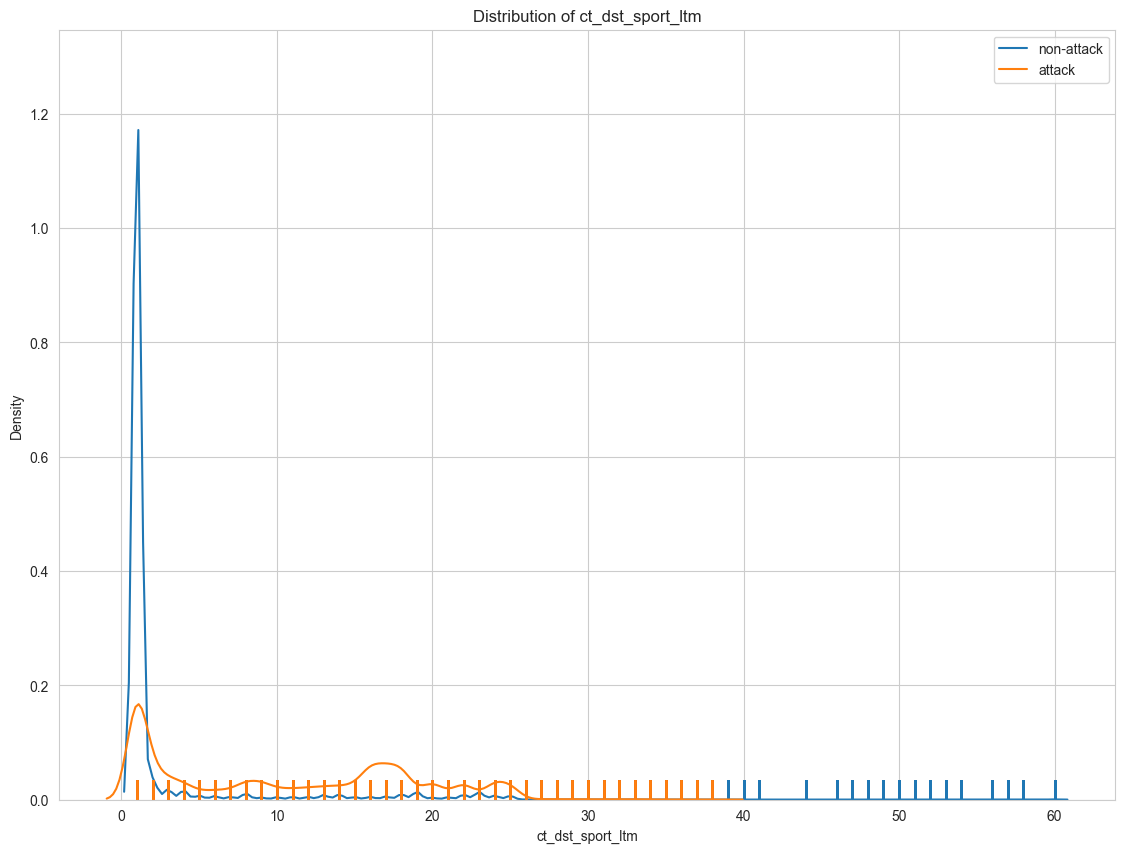

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_dst_sport_ltm')

# Display the complete figure 
plt.show()

#### `ct_dst_src_ltm	integer	No of connections of the same source (1) and t...`

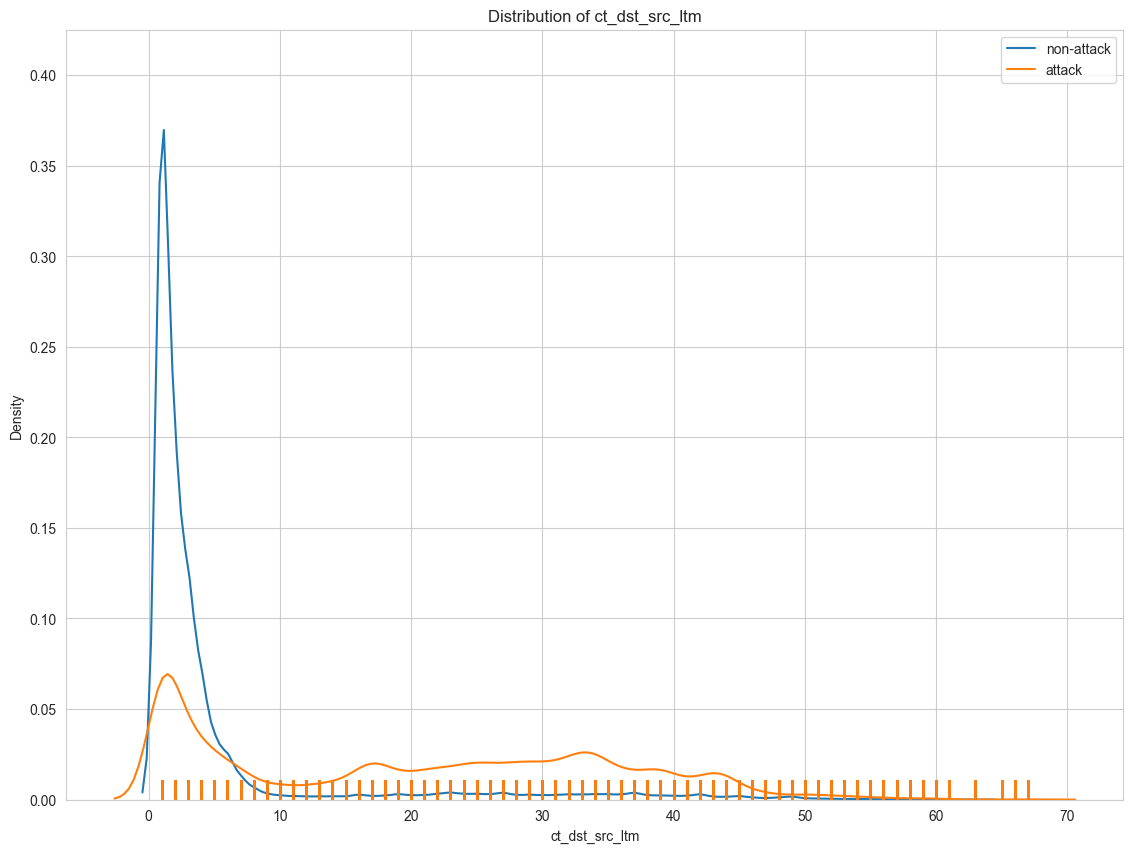

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('ct_dst_src_ltm')

# Display the complete figure 
plt.show()

#### `label	binary	0 for normal and 1 for attack records`

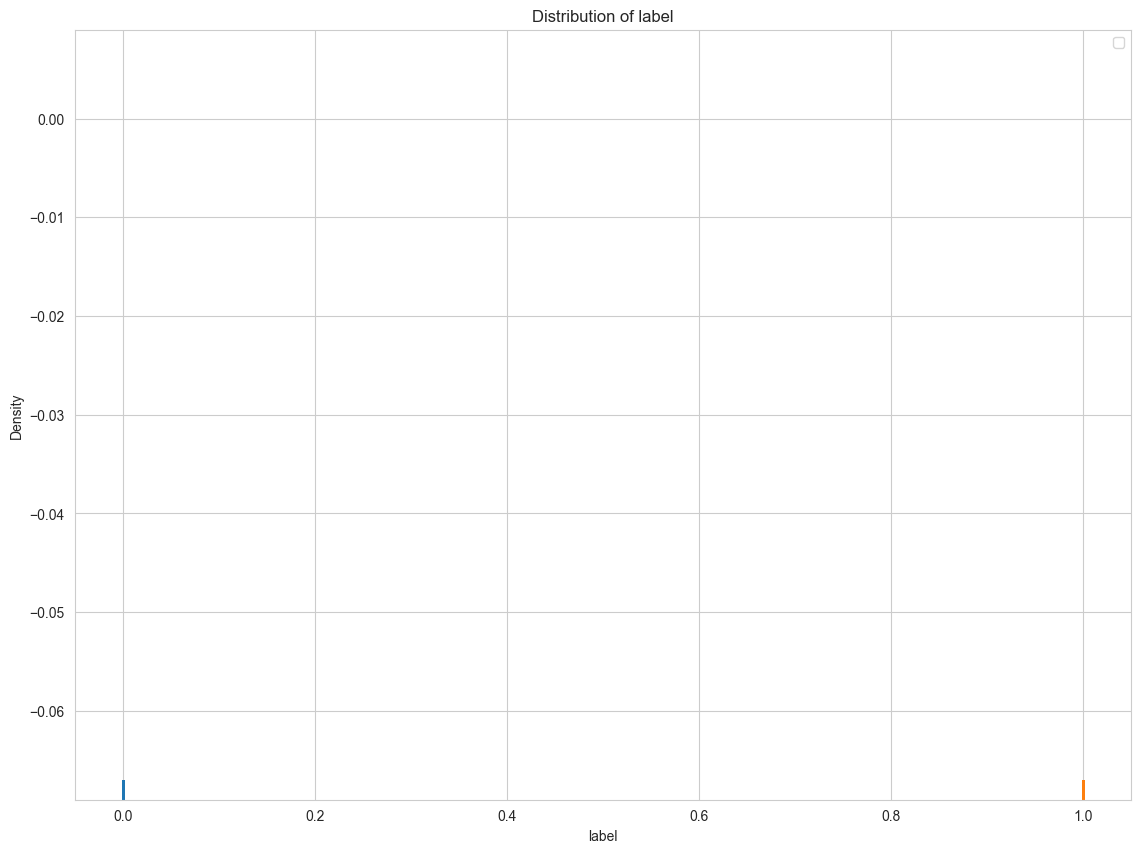

In [ ]:
# Create a figure with size 30x10 inches
plt.figure(figsize=(30,10))

# Plot feature distribution for attack and non-attack data
pdf_plot('label')

# Display the complete figure 
plt.show()

## Categorical Features


### **Count Plots in Data Analysis**:

(`Count Plots`)
Purpose: Count plots are used to visualize the frequency distribution of categorical features. They help in understanding the distribution of different categories and identifying any imbalances.
Usage in Cybersecurity: In cybersecurity, count plots can be used to visualize the distribution of different types of network traffic, attack categories, or protocol usage.
For example, we can use count plots to see how many records are labeled as normal or attack.




 **`Create Count Plot`**

In [57]:
def count_plot(col, data=df, figsize=(20,16), title="Distribution by Label", rotation=45):
    """
    Creates a countplot of a given feature showing distribution by label
    
    Parameters:
    -----------
    col : str
        Column name to plot
    data : pandas.DataFrame
        Input dataframe (default: df)
    figsize : tuple
        Figure size as (width, height) (default: (8,4))
    title : str
        Plot title (default: "Distribution by Label") 
    rotation : int
        X-axis label rotation in degrees (default: 45)
    """
    # Create figure and axes with custom size
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set style
    sns.set_style('whitegrid')
    
    # Create countplot
    ax = sns.countplot(x=col, hue='label', data=data)
    
    # Customize plot
    ax.legend(loc="upper right", labels=('non-attack', 'attack'))
    ax.set_title(title)
    plt.xticks(rotation=rotation)
    
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [58]:
# Define the reduce_column function to see only certian values in the column as some of the  column are too big
def reduce_column(value, to_keep):
    if value in to_keep:
        return value
    else:
        return 'other'


### **`Use count plot for categorical columns i.e   state,  attack_cat, proto ,service  `**

In [59]:
# Calculate percentage distribution of top 10 states
# Using normalize=True parameter for direct percentage calculation
# Round to 2 decimal places for better readability
df['state'].value_counts(normalize=True).head(10).multiply(100).round(2)


state
FIN    58.22
CON    22.07
INT    19.31
REQ     0.36
RST     0.02
ECO     0.01
CLO     0.01
URH     0.00
ACC     0.00
PAR     0.00
Name: proportion, dtype: float64

```
    'FIN',    # Final state - 58.22%
    'CON',    # Connection state - 22.07%
    'INT',    # Internal state - 19.31%
    'REQ',    # Request state - 0.36%
    'RST',    # Reset state - 0.02%
    'ECO',    # Echo state - 0.01%
    'CLO',    # Close state - 0.01%
    'URH',    # URH state - <0.01%
    'ACC',    # Accept state - <0.01%
    'PAR'     # Partial state - <0.01%

```

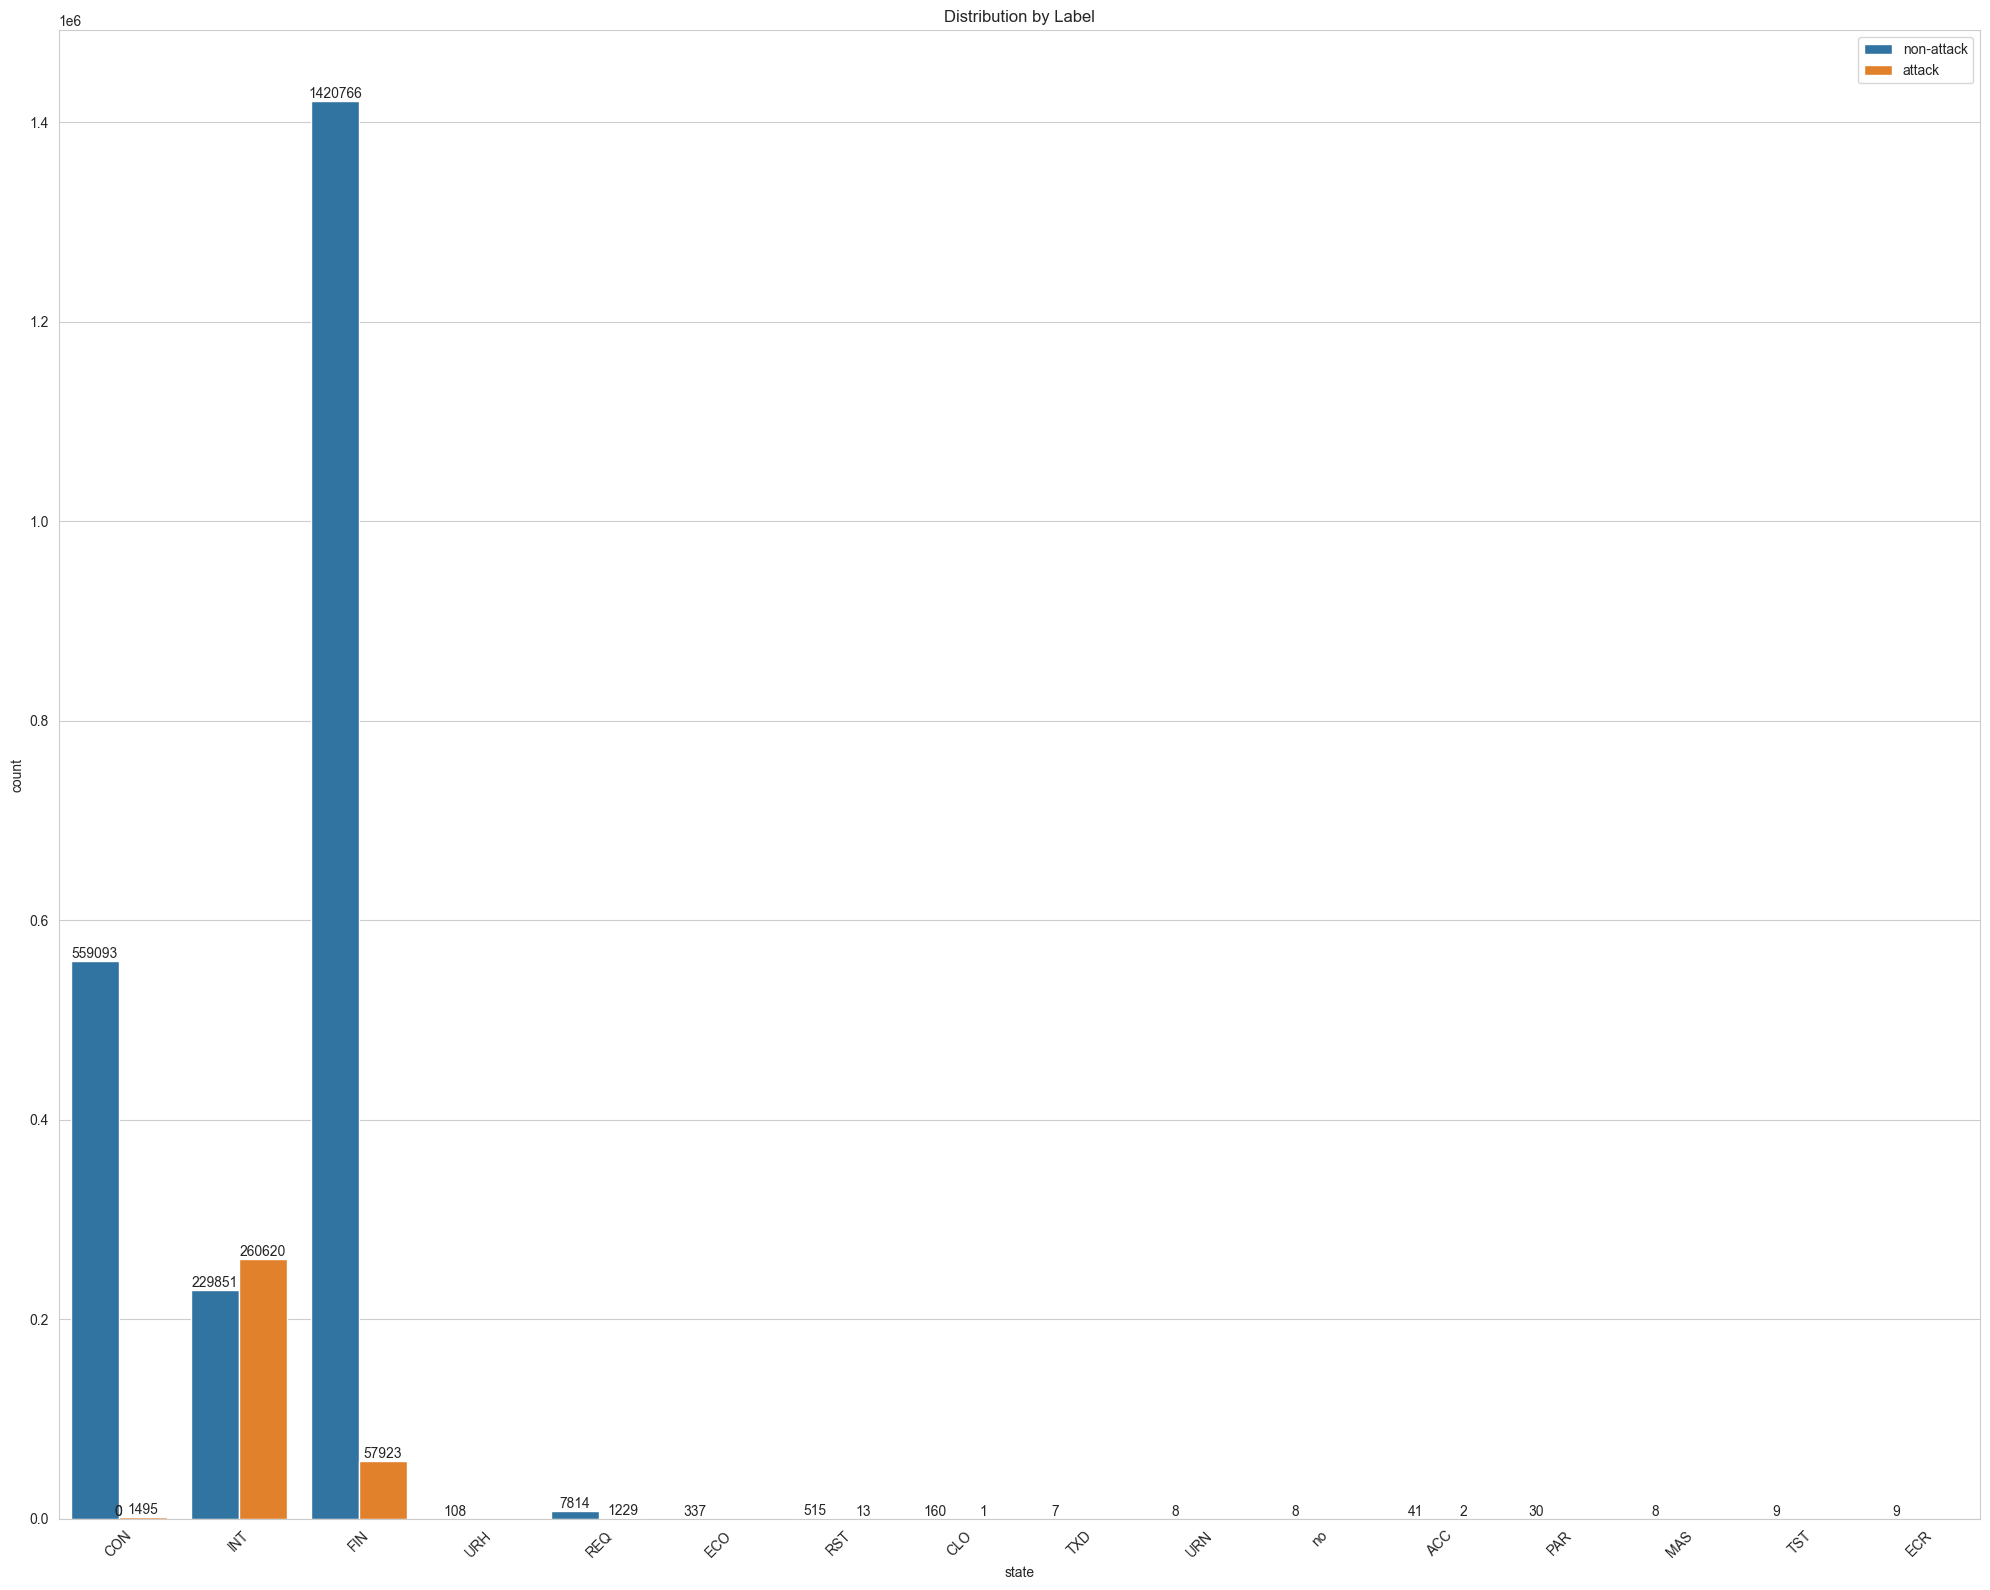

In [60]:
# Create a count plot to visualize the frequency distribution of states in the dataset
count_plot('state')


### **`attack_cat`**

In [61]:
# Calculate percentage distribution of top 10 states
# Using normalize=True parameter for direct percentage calculation
# Round to 2 decimal places for better readability
df['attack_cat'].value_counts(normalize=True).head(10).multiply(100).round(2)

attack_cat
Normal            87.35
Generic            8.48
Exploits           1.75
Fuzzers            0.95
DoS                0.64
Reconnaissance     0.55
Analysis           0.11
Backdoor           0.07
Shellcode          0.06
Backdoors          0.02
Name: proportion, dtype: float64

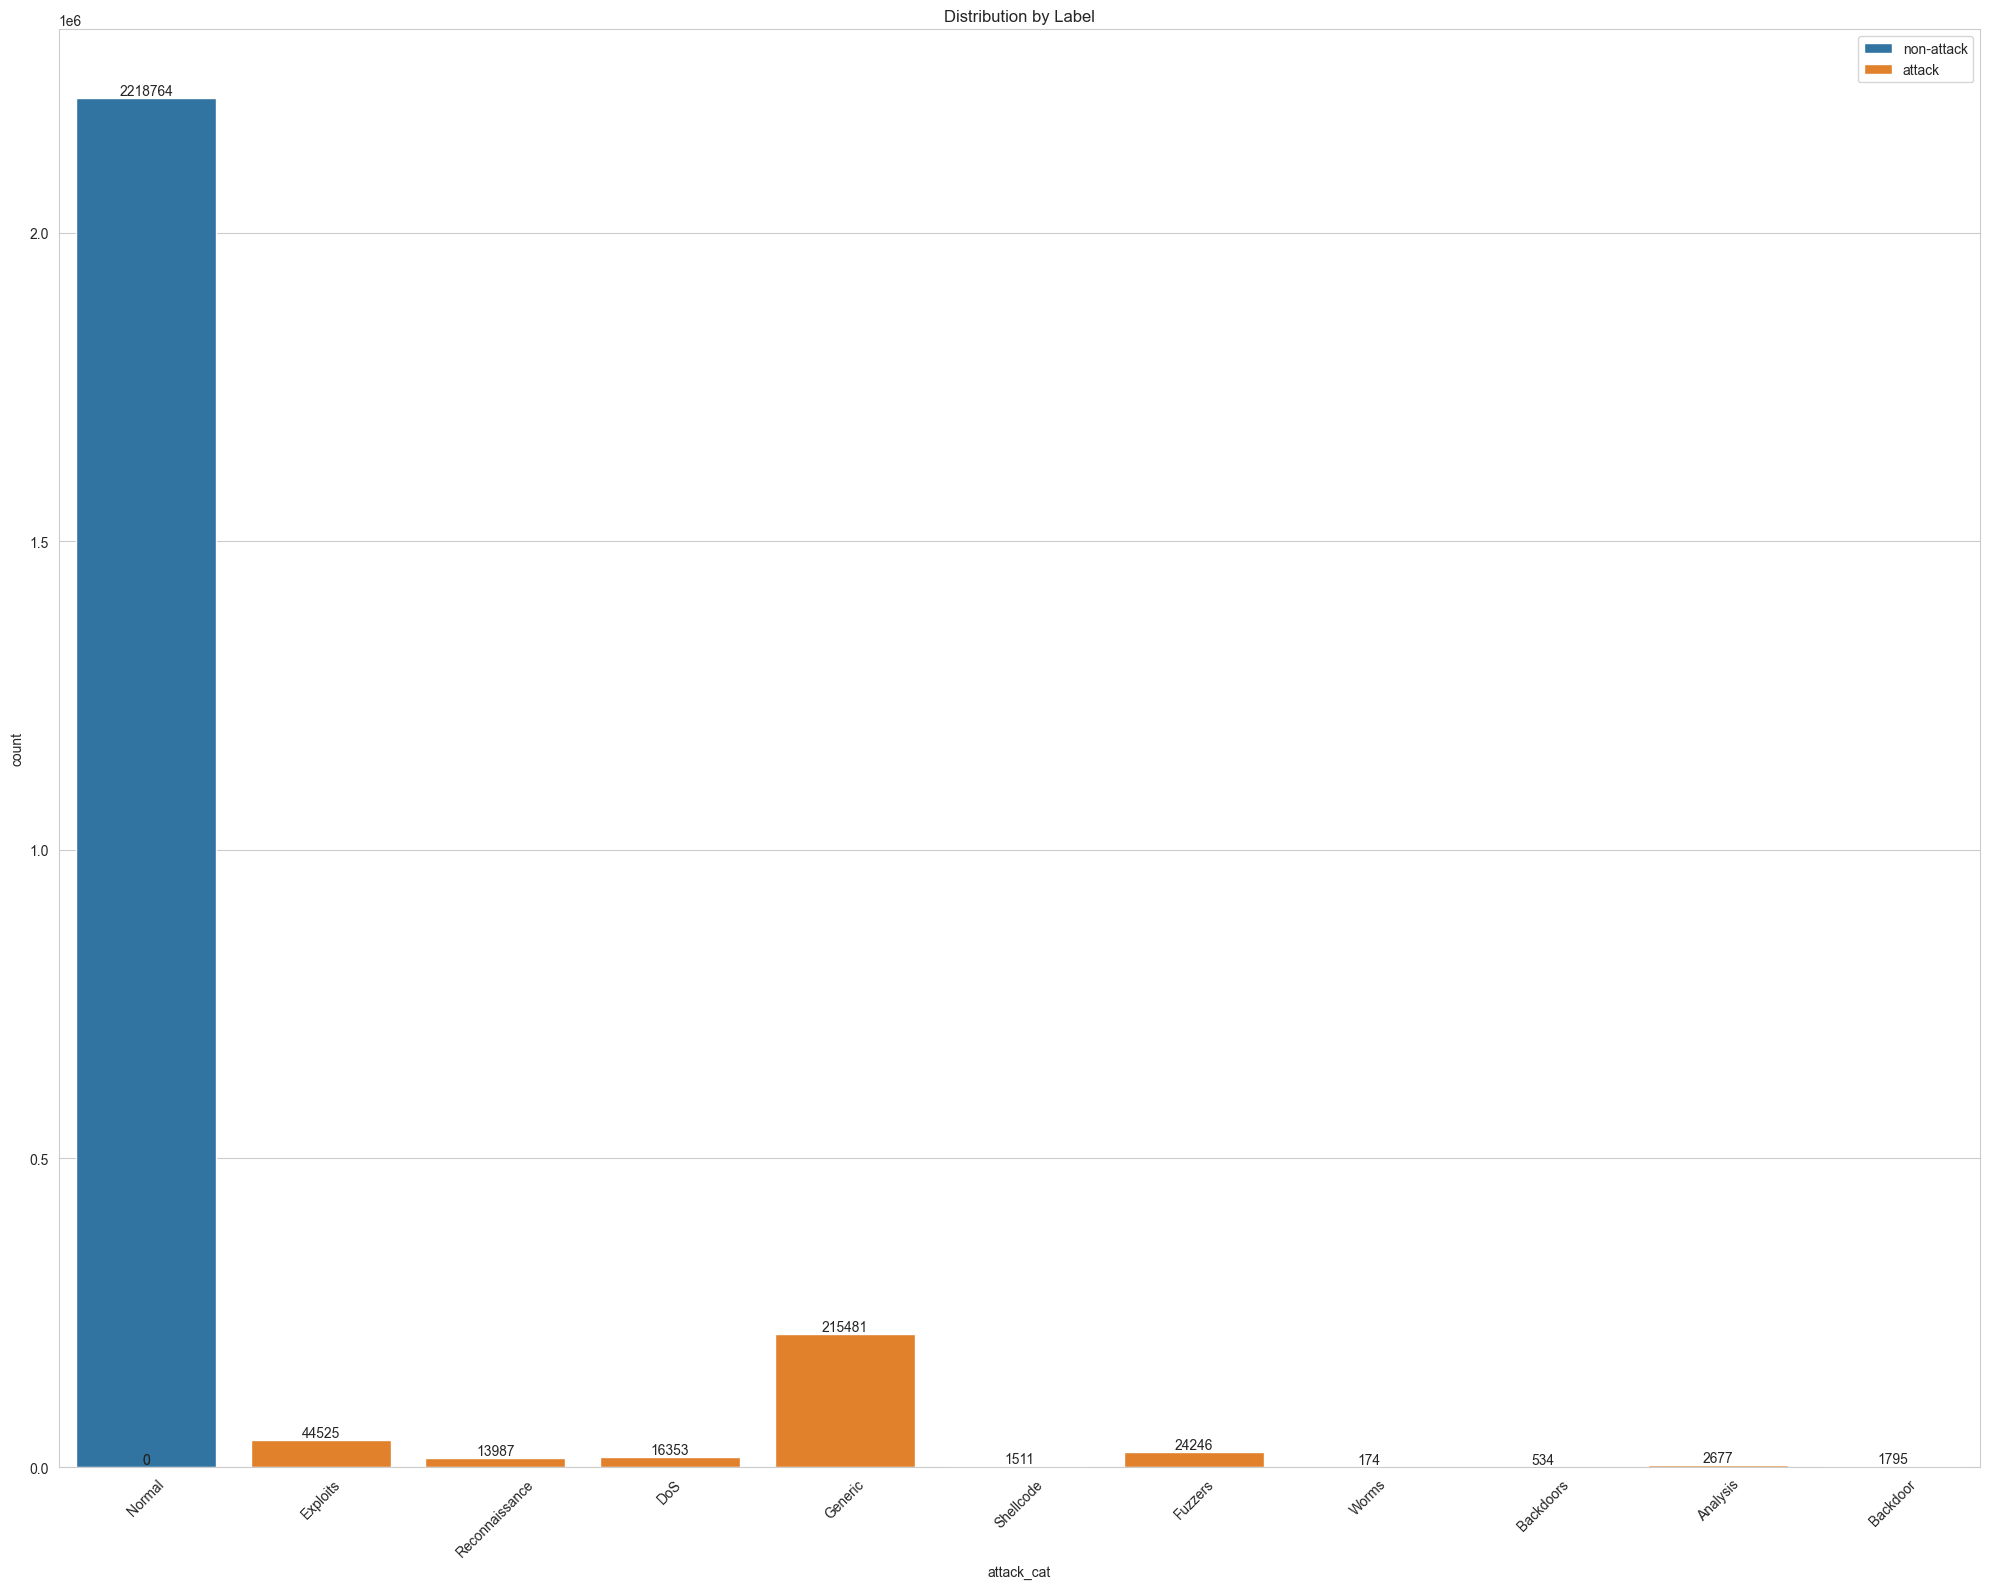

In [62]:
count_plot('attack_cat')

### **`proto`**

In [63]:
df['proto'].value_counts()*100/df.shape[0]


proto
tcp         58.860092
udp         38.992782
unas         0.637862
arp          0.396213
ospf         0.307002
              ...    
sccopmce     0.005394
igmp         0.002520
udt          0.000315
rtp          0.000276
esp          0.000079
Name: count, Length: 135, dtype: float64

### Understanding proto values

    'tcp',    # Transmission Control Protocol
    'udp',    # User Datagram Protocol
    'unas',   # Unassigned
    'arp',    # Address Resolution Protocol
    'ospf',   # Open Shortest Path First
    'sctp',   # Stream Control Transmission Protocol
    'icmp',   # Internet Control Message Protocol
    'any',    # Any Protocol
    'gre',    # Generic Routing Encapsulation
    'rsvp'    # Resource Reservation Protocol

In [64]:
# List of protocols to keep with their descriptions
to_keep = [
    'tcp',    # Transmission Control Protocol
    'udp',    # User Datagram Protocol
    'unas',   # Unassigned
    'arp',    # Address Resolution Protocol
    'ospf',   # Open Shortest Path First
    'sctp',   # Stream Control Transmission Protocol
    'icmp',   # Internet Control Message Protocol
    'any',    # Any Protocol
    'gre',    # Generic Routing Encapsulation
    'rsvp',   # Resource Reservation Protocol
    'ipv6',   # Internet Protocol version 6
    'mobile', # Mobile IP
    'swipe',  # Space and Warfare IP Encapsulation
    'pim',    # Protocol Independent Multicast
    'sun-nd', # SUN ND Protocol
    'sep'     # Sequential Exchange Protocol
]
df['proto_reduced'] = df['proto'].apply(reduce_column, args=(to_keep,))


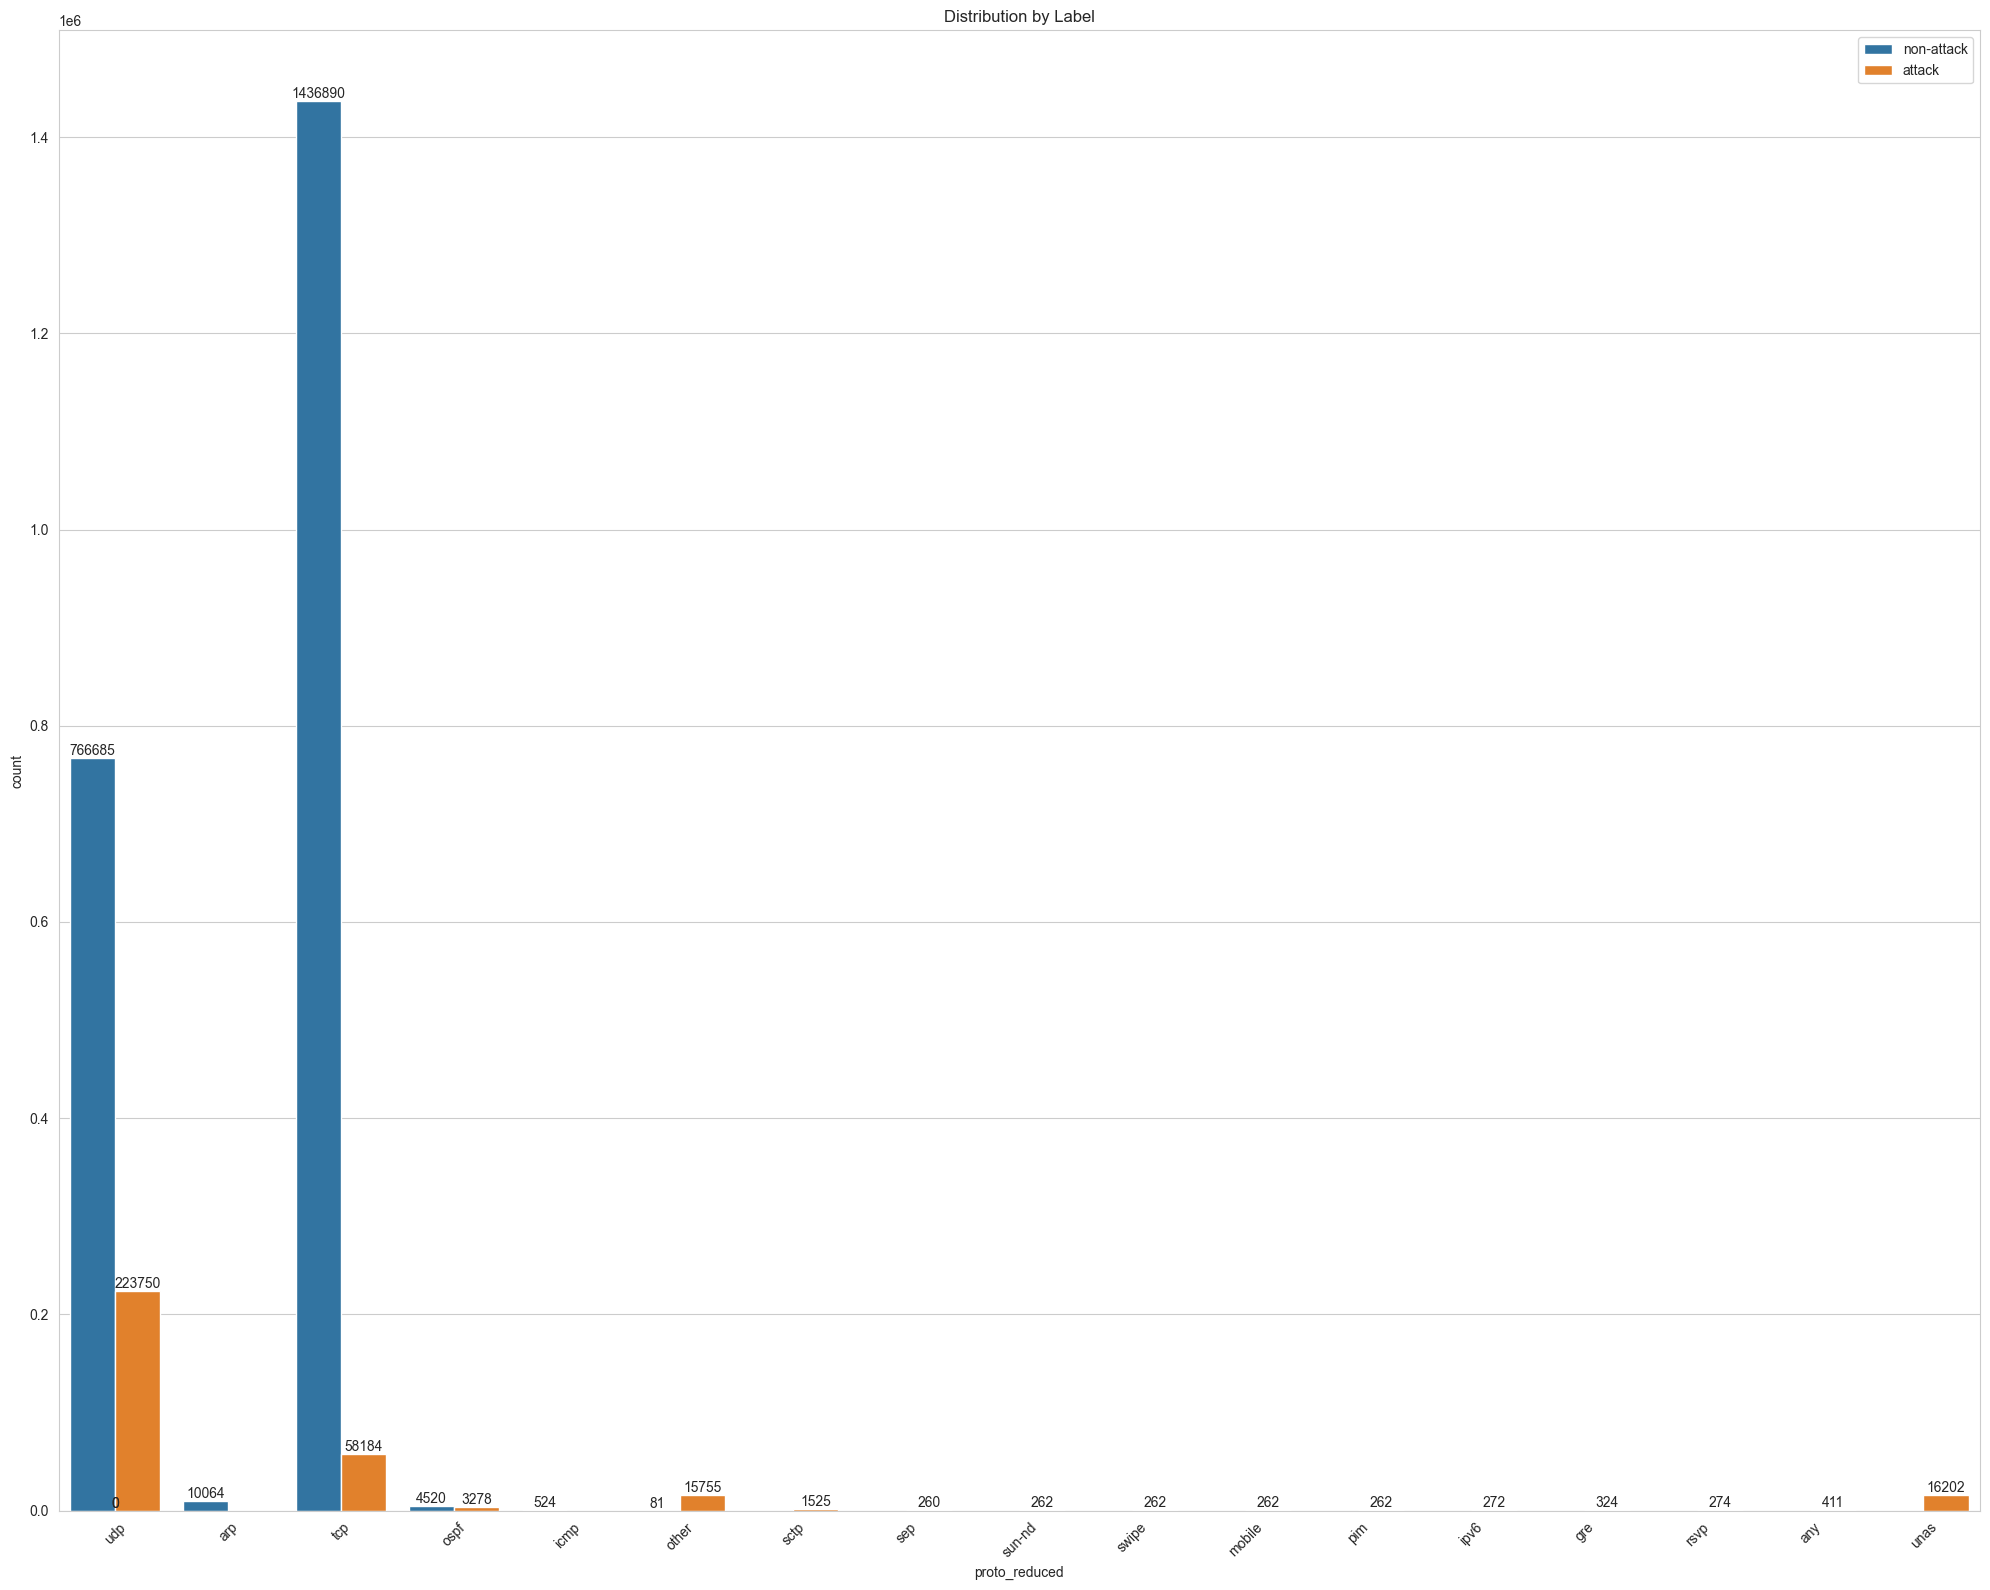

In [65]:
count_plot('proto_reduced')

### **`Service`**


In [66]:
df['service'].value_counts()

service
none        1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

### Understanding Service values
    'none',    # No service
    'dns',     # Domain Name System
    'http',    # Hypertext Transfer Protocol
    'ftp-data',# File Transfer Protocol Data
    'smtp',    # Simple Mail Transfer Protocol
    'ftp',     # File Transfer Protocol
    'ssh',     # Secure Shell
    'pop3',    # Post Office Protocol v3
    'dhcp',    # Dynamic Host Configuration Protocol
    'ssl',     # Secure Sockets Layer
    'snmp',    # Simple Network Management Protocol
    'radius',  # Remote Authentication Dial-In User Service
    'irc'      # Internet Relay Chat

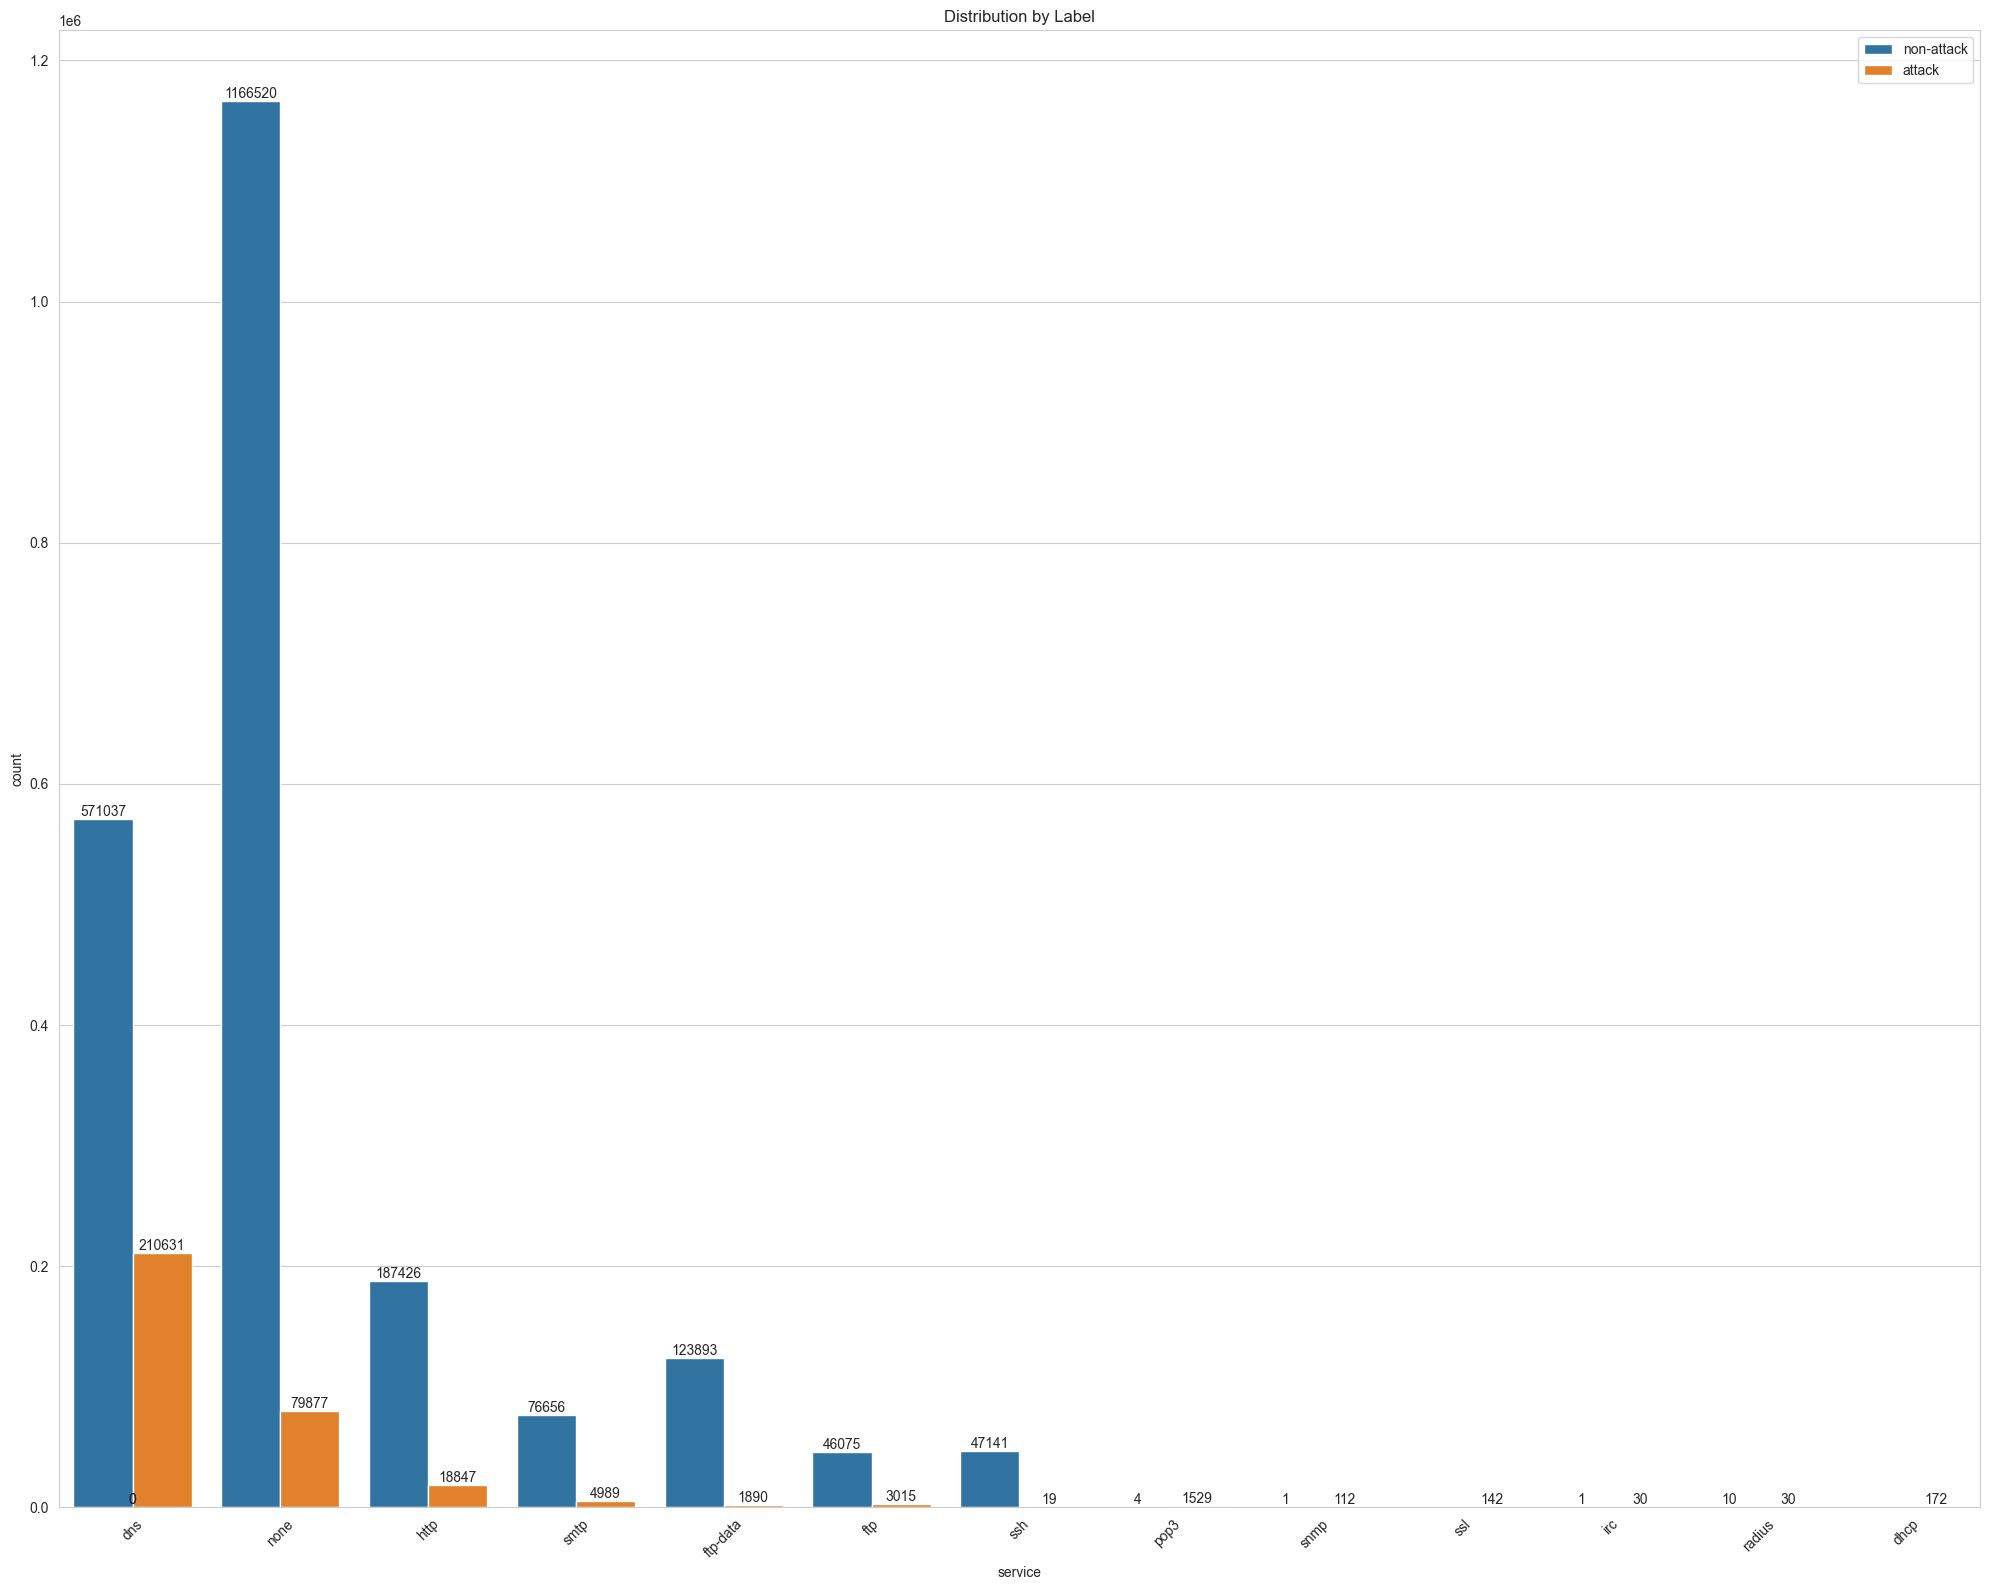

In [67]:
count_plot('service')